<a href="https://colab.research.google.com/github/najmul19/Bangladesh_2.0-Firebase/blob/master/individual_model_and_final_model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10 

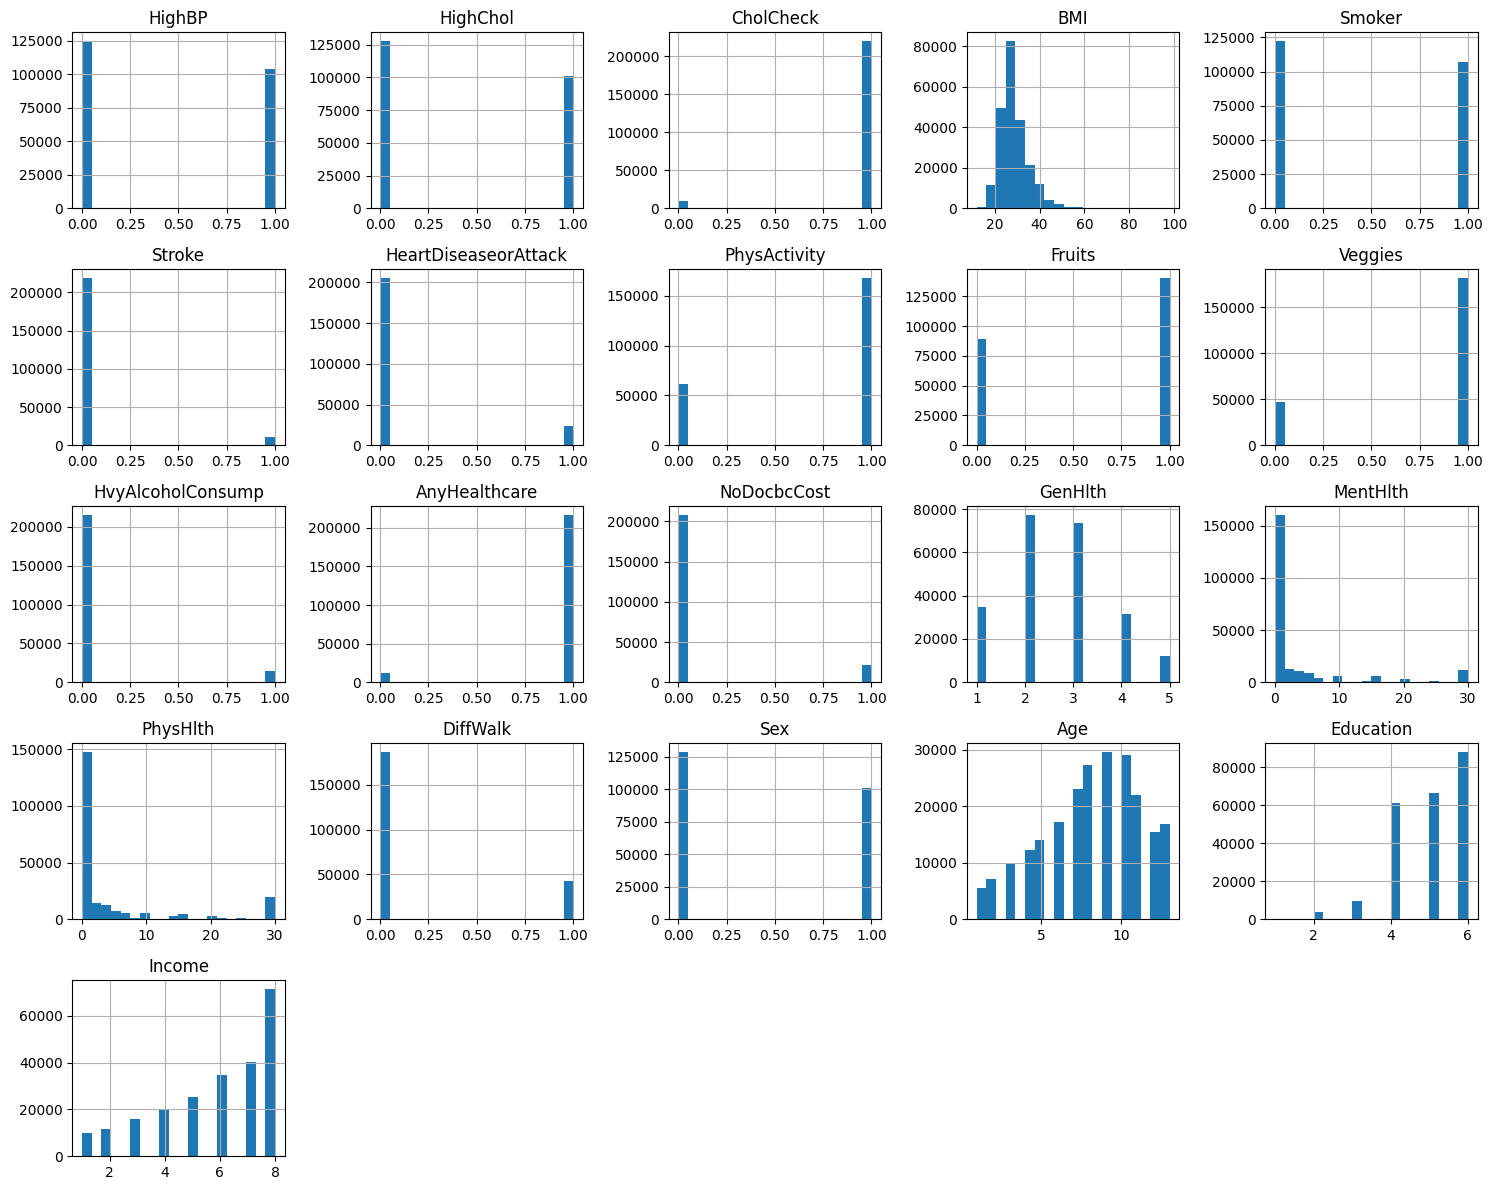

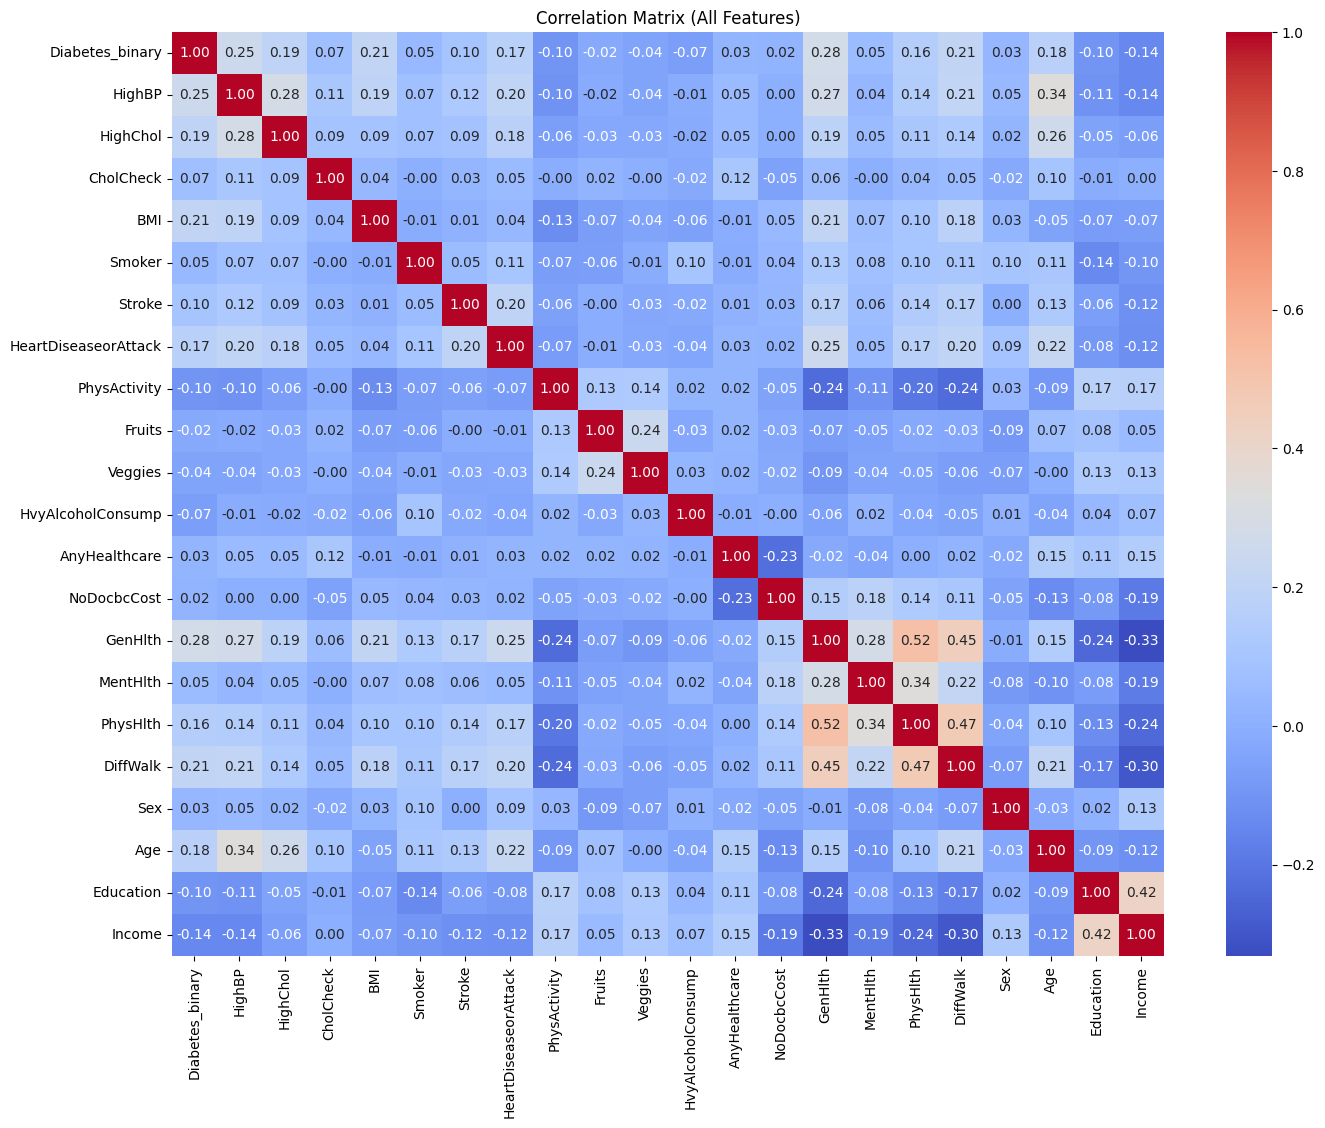

Correlation with Diabetes_binary:

GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Stroke                  0.099193
CholCheck               0.072523
MentHlth                0.054153
Smoker                  0.045504
Sex                     0.032724
AnyHealthcare           0.025331
NoDocbcCost             0.020048
Fruits                 -0.024805
Veggies                -0.041734
HvyAlcoholConsump      -0.065950
PhysActivity           -0.100404
Education              -0.102686
Income                 -0.140659
Name: Diabetes_binary, dtype: float64
GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
Phy

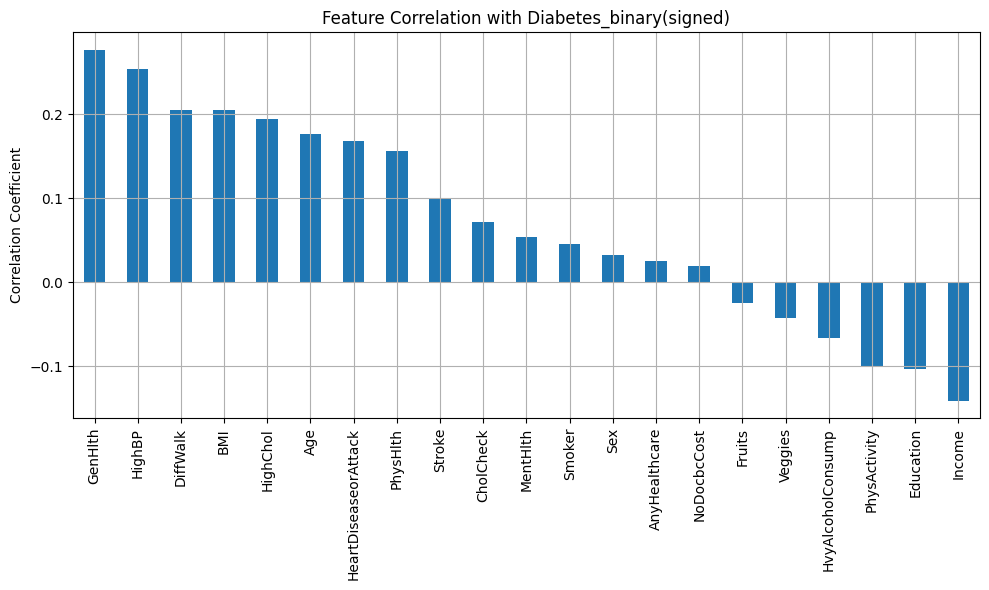

/tmp/ipython-input-1054288185.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=t_cor.values, y=t_cor.index, palette='coolwarm')


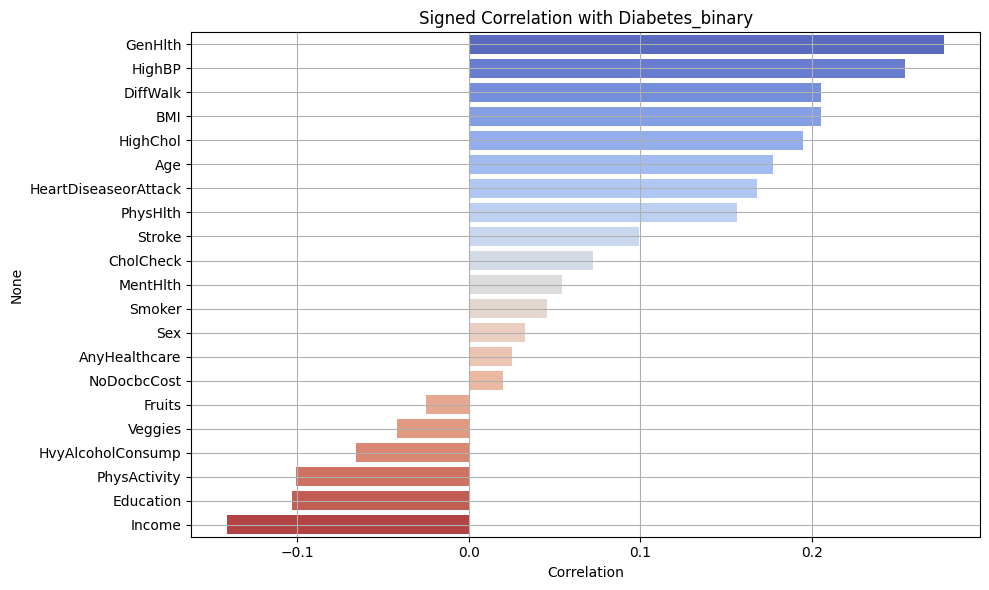

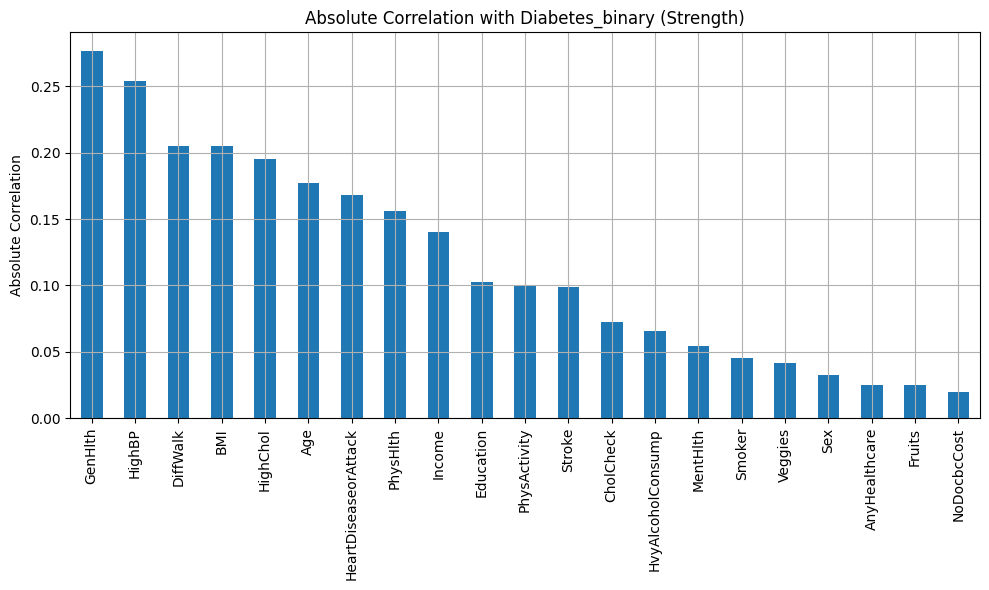

/tmp/ipython-input-1054288185.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_abs.values, y=corr_abs.index, palette='Blues_r')


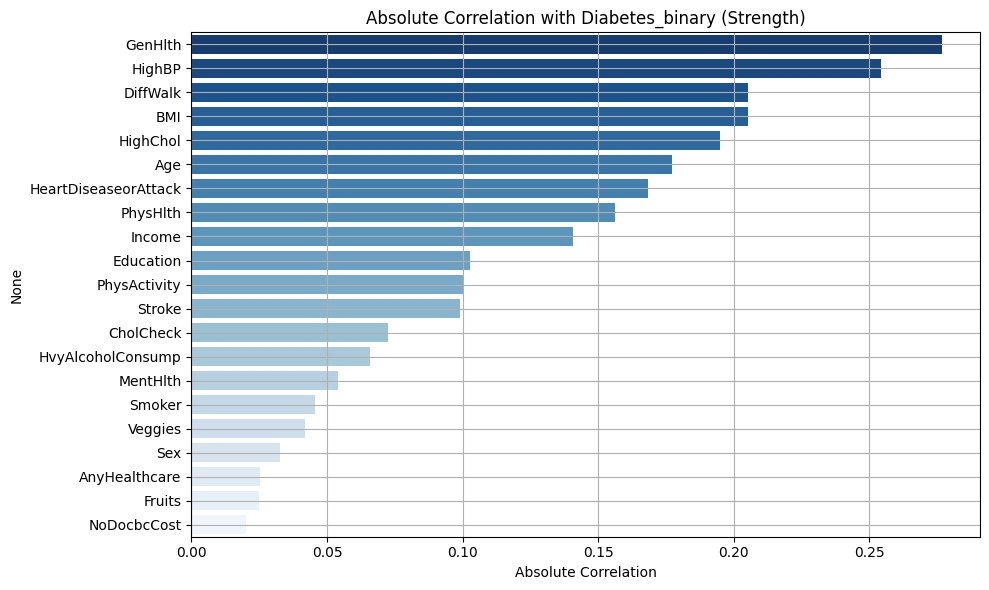

                 Feature       VIF
13               GenHlth  1.716096
15              PhysHlth  1.594297
16              DiffWalk  1.511628
20                Income  1.430313
18                   Age  1.353317
0                 HighBP  1.301200
19             Education  1.272080
14              MentHlth  1.221587
6   HeartDiseaseorAttack  1.167062
1               HighChol  1.158112
12           NoDocbcCost  1.135647
7           PhysActivity  1.130509
3                    BMI  1.121050
11         AnyHealthcare  1.109839
9                Veggies  1.098133
8                 Fruits  1.097947
5                 Stroke  1.077470
4                 Smoker  1.076032
17                   Sex  1.075743
2              CholCheck  1.035274
10     HvyAlcoholConsump  1.026354


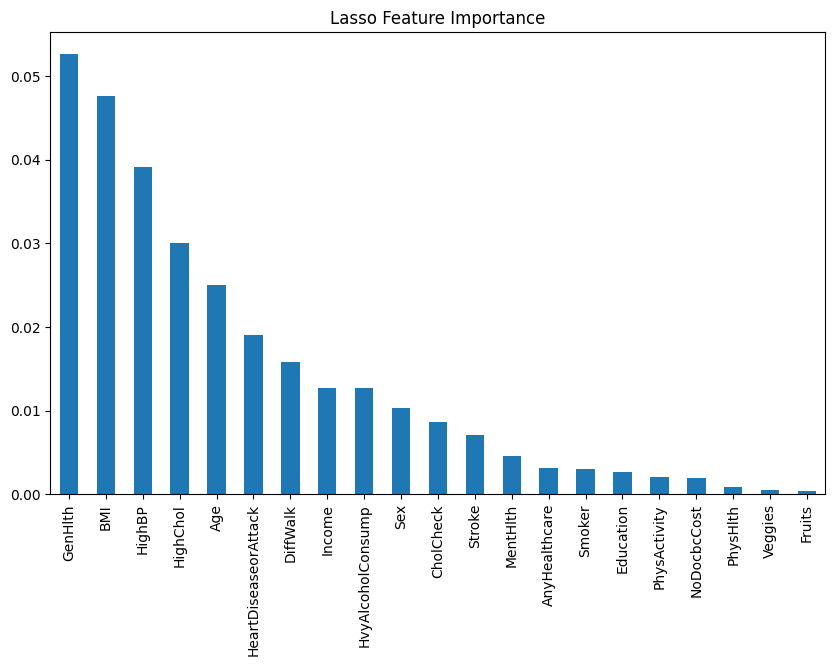

Top Features from RFE: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'Sex', 'Age', 'Income']


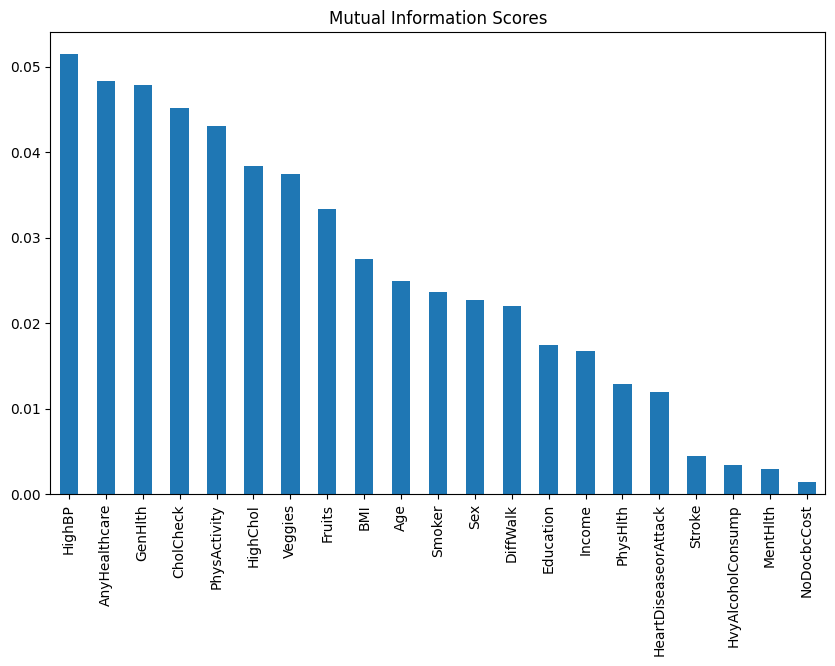


Combined Feature Rankings:
                      LassoRank  MIRank  RFERank  AverageRank
GenHlth                     1.0     3.0      4.0         2.67
HighBP                      3.0     1.0     10.0         4.67
Age                         5.0    10.0      2.0         5.67
BMI                         2.0     9.0      7.0         6.00
HighChol                    4.0     6.0      9.0         6.33
CholCheck                  11.0     4.0      8.0         7.67
Income                      8.0    15.0      1.0         8.00
Sex                        10.0    12.0      3.0         8.33
HeartDiseaseorAttack        6.0    17.0      6.0         9.67
HvyAlcoholConsump           9.0    19.0      5.0        11.00
AnyHealthcare              14.0     2.0     22.0        12.67
DiffWalk                    7.0    13.0     22.0        14.00
PhysActivity               17.0     5.0     22.0        14.67
Smoker                     15.0    11.0     22.0        16.00
Veggies                    20.0     7.0   

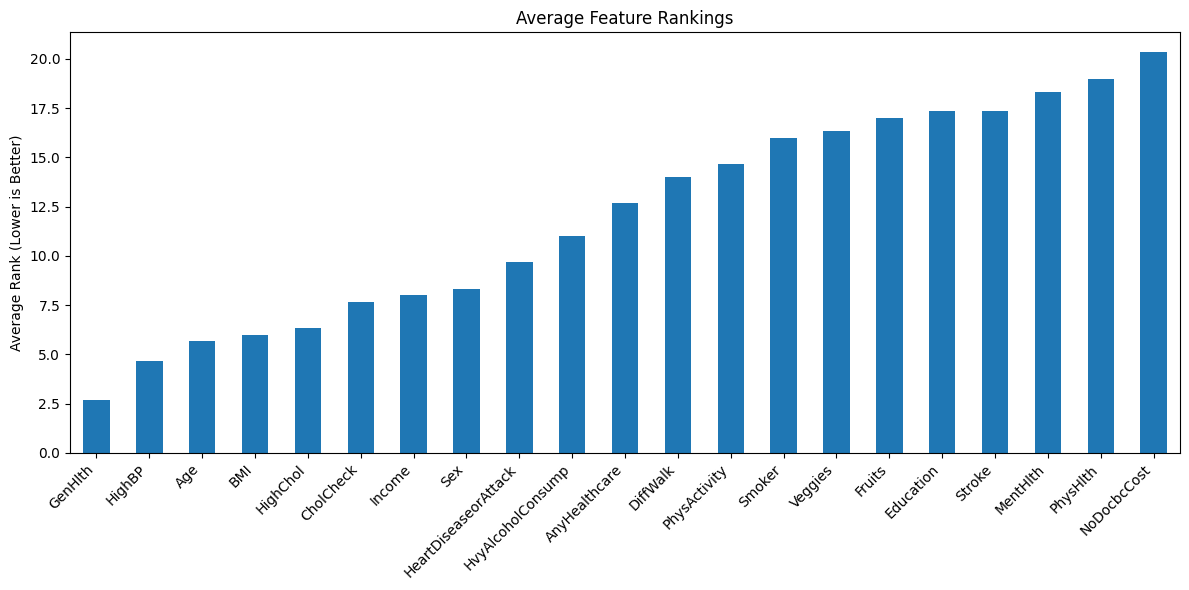

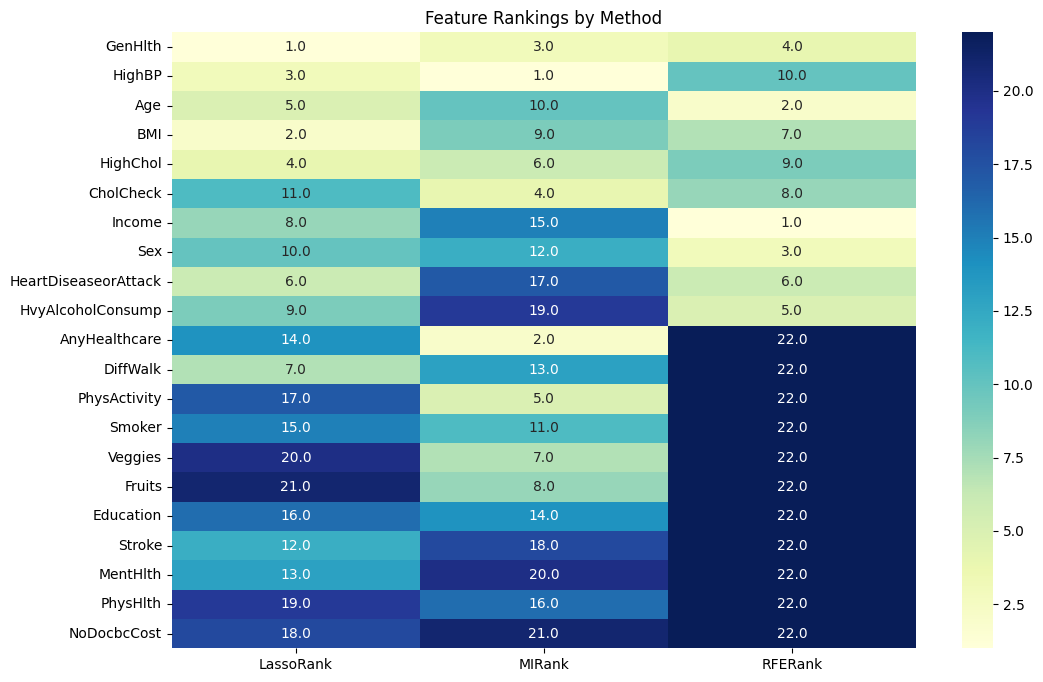

Original class distribution:
Diabetes_binary
0.0    194377
1.0     35097
Name: count, dtype: int64


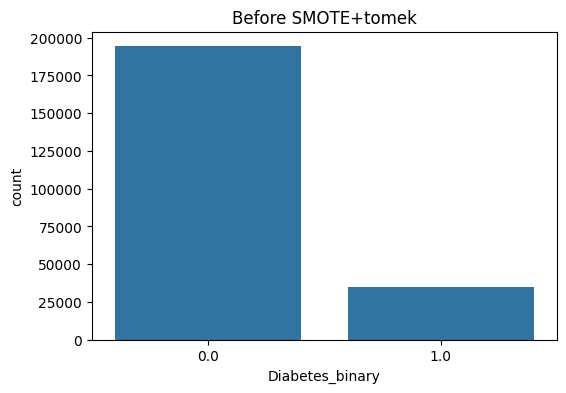

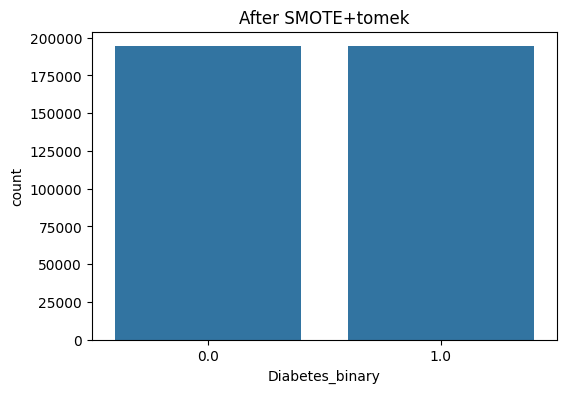

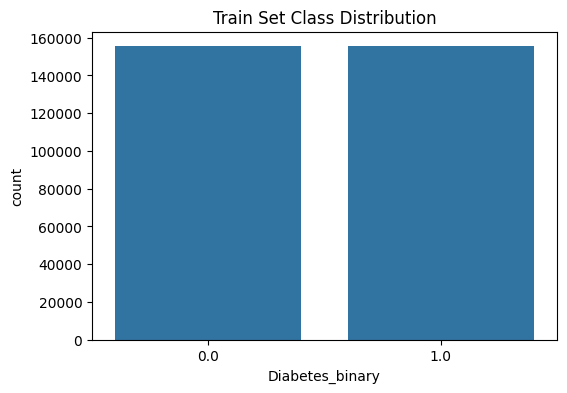

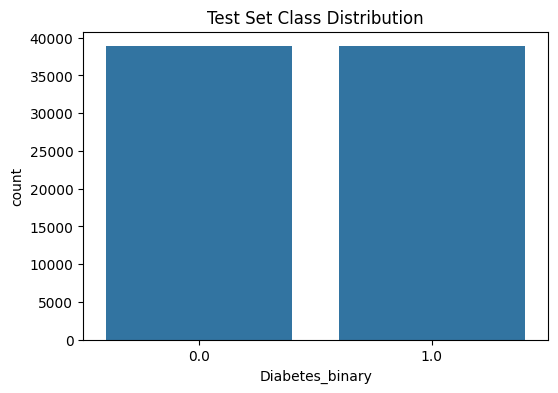

Train set:
 Diabetes_binary
1.0    0.500002
0.0    0.499998
Name: proportion, dtype: float64

Test set:
 Diabetes_binary
0.0    0.500006
1.0    0.499994
Name: proportion, dtype: float64
Train set count:
 Diabetes_binary
1.0    155446
0.0    155445
Name: count, dtype: int64

Test set count:
 Diabetes_binary
0.0    38862
1.0    38861
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
df = pd.read_csv("/content/sample_data/diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()
# Step 1: Data Preprocessing
# Check for nulls and data types
missing_values = df.isnull().sum()
missing_values
d_types = df.dtypes
d_types
#Check duplicate rows
duplicate_c = df.duplicated().sum()
duplicate_c
df
feature_names = df.drop("Diabetes_binary", axis=1).columns.tolist()
print(feature_names)
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]
X.head()
df.info()
#duplicates value remove
df = df.drop_duplicates()
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]
X,y
#Check duplicate rows again
duplicate_c = df.duplicated().sum()
duplicate_c
y.value_counts(normalize=True)
#See features have <1% variance
low_variance = (X.nunique() / len(X)) < 0.01
print(X.columns[low_variance])
#step2: feature analysis
import seaborn as sns
#histograms
X.hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()
#Correlation Matrix(all features)
plt.figure(figsize=(16, 12))
c_matrix = df.corr(numeric_only=True)
sns.heatmap(c_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (All Features)")
plt.show()
#Correlation with Target
t_cor = c_matrix["Diabetes_binary"].drop("Diabetes_binary").sort_values(ascending=False)
print("Correlation with Diabetes_binary:\n")
print(t_cor)
#corr_abs t_cor = c_matrix["Diabetes_binary"].drop("Diabetes_binary").abs().sort_values(ascending=False)
corr_abs =t_cor.abs().sort_values(ascending=False)
#top correlated features
print(corr_abs)
#Visual correlations with target signed
plt.figure(figsize=(10, 6))
t_cor.plot(kind='bar')
plt.title("Feature Correlation with Diabetes_binary(signed)")
plt.ylabel("Correlation Coefficient")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x=t_cor.values, y=t_cor.index, palette='coolwarm')
plt.title("Signed Correlation with Diabetes_binary")
plt.xlabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()
#Visual absolute correlations
plt.figure(figsize=(10, 6))
corr_abs.plot(kind='bar')
plt.title("Absolute Correlation with Diabetes_binary (Strength)")
plt.ylabel("Absolute Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()
#Visual absolute correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_abs.values, y=corr_abs.index, palette='Blues_r')
plt.title("Absolute Correlation with Diabetes_binary (Strength)")
plt.xlabel("Absolute Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()
#Multicollinearity Check(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_const = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]  # i+1 because of const
print(vif_data.sort_values("VIF", ascending=False))
#Feature Importance Using Lasso Regression(Selection)
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_scaled, y)

feature_importance = pd.Series(np.abs(lasso.coef_), index=X.columns)
feature_importance = feature_importance[feature_importance > 0]
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,6), title="Lasso Feature Importance")
plt.show()
#Recursive Feature Elimination (RFE) with Logistic
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_scaled, y)

selected_features = X.columns[rfe.support_]
print("Top Features from RFE:", selected_features.tolist())
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
mi_series.plot(kind='bar', figsize=(10,6), title='Mutual Information Scores')
plt.show()
#Combine Feature Rankings

import pandas as pd

#Convert RFE feature list into ranking (1 = most important)
rfe_ranks = pd.Series(
    data=[len(selected_features) - i for i in range(len(selected_features))],
    index=selected_features,
    name='RFERank'
)
#Normalize Lasso & MI into Rankings
lasso_rank = feature_importance.abs().rank(ascending=False).rename('LassoRank')
mi_rank = mi_series.rank(ascending=False).rename('MIRank')
#Combine All Rankings into One DataFrame

feature_rank_df = pd.concat([lasso_rank, mi_rank, rfe_ranks], axis=1)

#Fill missing RFE ranks with worst rank(total number of features + 1)
feature_rank_df['RFERank'] = feature_rank_df['RFERank'].fillna(len(feature_rank_df) + 1)

#Compute Average Ranking
feature_rank_df['AverageRank'] = feature_rank_df[['LassoRank', 'MIRank', 'RFERank']].mean(axis=1)

#Sort by Average Ranking
combined_rank = feature_rank_df.sort_values(by='AverageRank')

print("\nCombined Feature Rankings:")
print(combined_rank.round(2))
#Bar plot of average ranks
combined_rank['AverageRank'].plot(kind='bar', figsize=(12,6), title='Average Feature Rankings')
plt.ylabel('Average Rank (Lower is Better)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
ordered_df = combined_rank.sort_values('AverageRank')

#Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ordered_df[['LassoRank', 'MIRank', 'RFERank']], annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Feature Rankings by Method")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

#menually drop low imapacted feature
top_features = combined_rank.head(18).index.tolist()
X_selected = X[top_features]
X_selected
#Step 3: Balancing the Data using SMOTE
#before going to next step check it
print("Original class distribution:")
print(y.value_counts())
#start step3 from here, with SMOTE
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(random_state=42)

#for x_selected
#X_resampled, y_resampled = smote.fit_resample(X_selected, y)
#X_resampled, y_resampled = smote.fit_resample(X, y)
# Before SMOTE
#plt.figure(figsize=(6,4))
#sns.countplot(x=y)
#plt.title("Before SMOTE")
#plt.show()

# After SMOTE
#plt.figure(figsize=(6,4))
#sns.countplot(x=y_resampled)
#plt.title("After SMOTE")
#plt.show()
#print(y_resampled.value_counts(normalize=True))
#step4: Train / Test split

# Use SMOTE + Tomek Links balanced data
#SMOTE + Tomek Links
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_bal, y_bal = smote_tomek.fit_resample(X_selected, y)
# Before SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Before SMOTE+tomek")
plt.show()

# After SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_bal)
plt.title("After SMOTE+tomek")
plt.show()

X_final = X_bal
y_final = y_bal
#train test, for testing it will be 20%
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final,
    test_size=0.2,
    random_state=42,
    stratify=y_final
)
# Training set distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title("Train Set Class Distribution")
plt.show()

# Testing set distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test)
plt.title("Test Set Class Distribution")
plt.show()
print("Train set:\n", y_train.value_counts(normalize=True))
print("\nTest set:\n", y_test.value_counts(normalize=True))
print("Train set count:\n", y_train.value_counts())
print("\nTest set count:\n", y_test.value_counts())


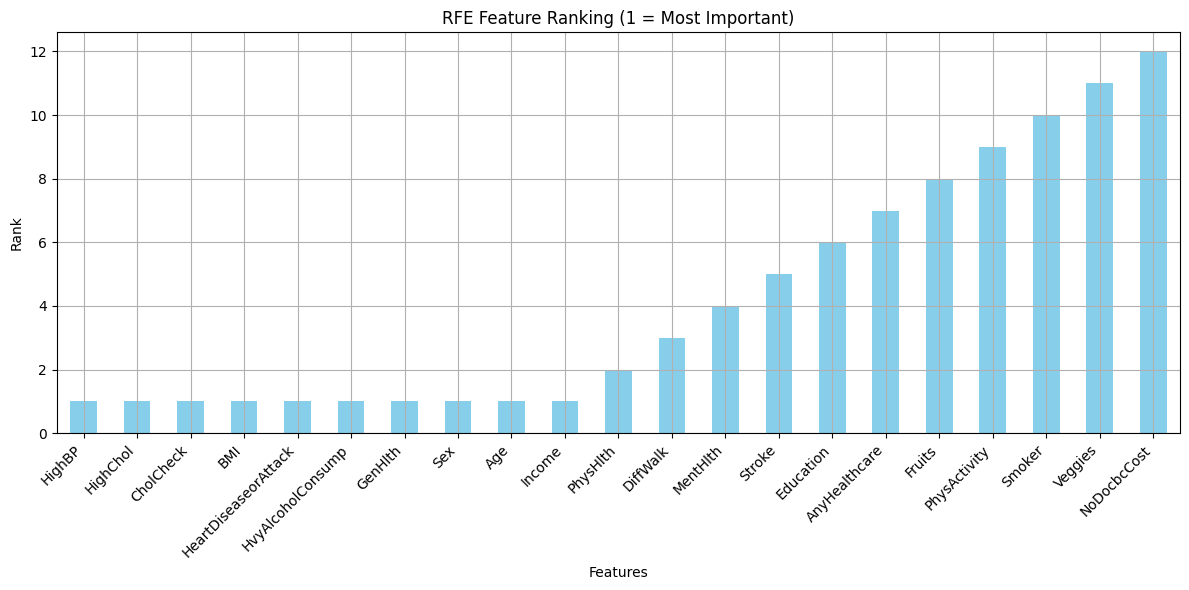

In [ ]:
# RFE Rankings
rfe_ranking = pd.Series(rfe.ranking_, index=X.columns)

# Plot RFE ranking
plt.figure(figsize=(12,6))
rfe_ranking.sort_values().plot(kind='bar', color='skyblue')
plt.title("RFE Feature Ranking (1 = Most Important)")
plt.ylabel("Rank")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!pip install lightgbm

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [ ]:

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
L_GBM_params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": "auc",
    "learning_rate": 0.05,
    "num_leaves": 64,
    "max_depth": 7,
    "min_data_in_leaf": 100,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "lambda_l1": 1.0,
    "lambda_l2": 1.0,
    "n_estimators": 1000,
    "n_jobs": -1,
    "random_state": 42
}
lgbm = LGBMClassifier(**L_GBM_params)

knn=KNeighborsClassifier(
    n_neighbors=3,
    weights='distance',
    p=1,
    n_jobs=-1
)


xgb = XGBClassifier(
    n_estimators=900,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)


rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)


cat = CatBoostClassifier(
    iterations=5000,
    learning_rate=0.05,
    depth=8,
    l2_leaf_reg=3,
    loss_function="Logloss",
    eval_metric="AUC",
    random_seed=42,
    task_type="CPU",
    verbose=0,
    od_type="Iter",
    od_wait=200
)



In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)


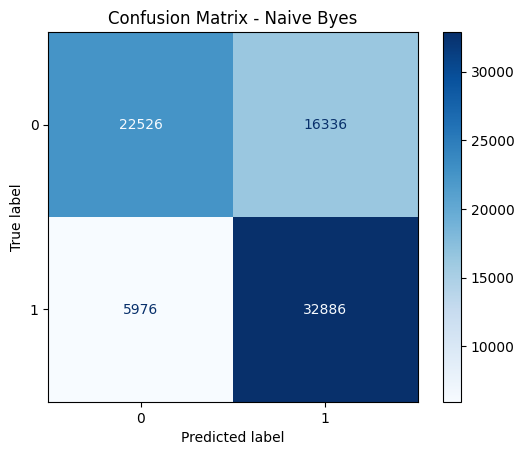

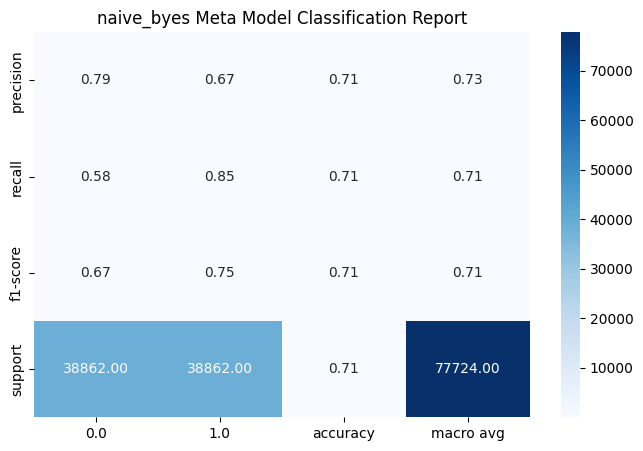

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Naive Byes")
plt.savefig("naive_byescondusion_Matrix_up.png", dpi=300, bbox_inches="tight")
plt.show()
report_dict_naive_byes = classification_report(y_test, y_pred_nb, output_dict=True)
report_df_naive_byes = pd.DataFrame(report_dict_naive_byes).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df_naive_byes.iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".2f")
plt.title("naive_byes Meta Model Classification Report")
plt.savefig("naive_byes_meta_model_calssifire_report_up.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,accuracy_score

accuracy_nb = accuracy_score(y_test, y_pred_nb)

y_proba_nb = nb.predict_proba(X_test)[:, 1]

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

accuracy_nb

0.7129329422057537

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    solver='saga',    # or 'saga' for large/sparse datasets
    random_state=42
)

log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)


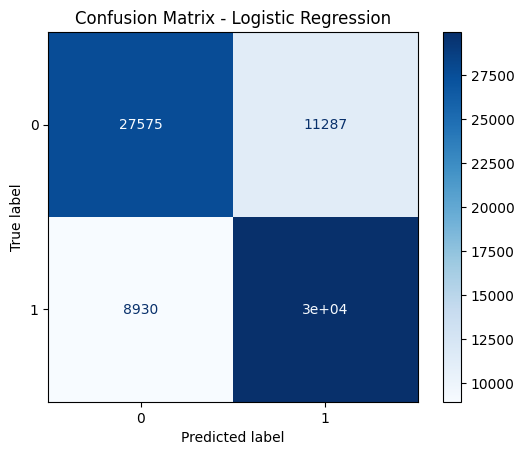

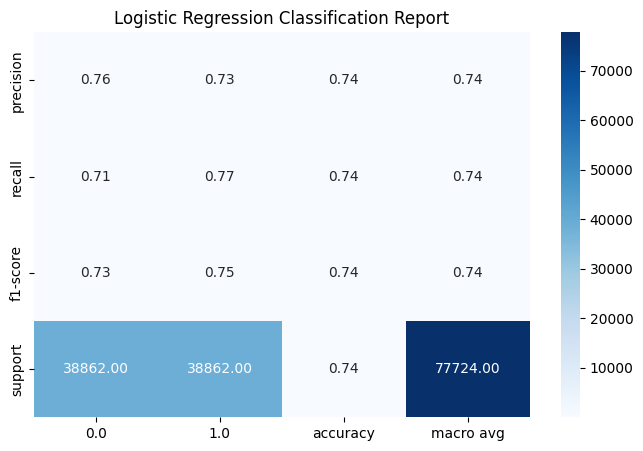

In [ ]:
cm = confusion_matrix(y_test, y_pred_log_reg)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.savefig("lr_condusion_Matrix_up.png", dpi=300, bbox_inches="tight")
plt.show()
report_dict_lr = classification_report(y_test, y_pred_log_reg, output_dict=True)
report_df_lr = pd.DataFrame(report_dict_lr).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df_lr.iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".2f")
plt.title("Logistic Regression Classification Report")
plt.savefig("lr_calssifire_report_up.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
y_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_proba_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_log_reg

0.7398872935000772

In [ ]:
# LightGBM Classifier
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. 

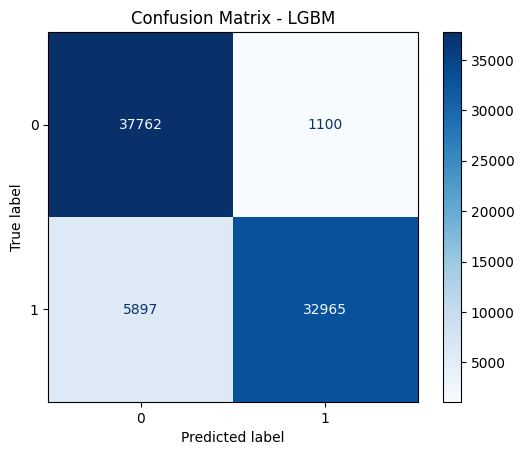

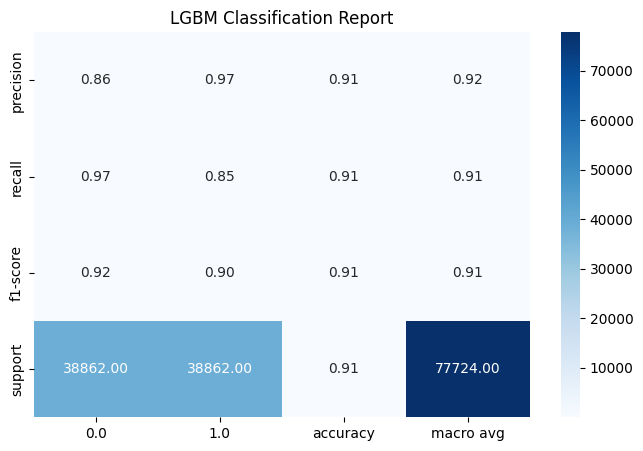

In [ ]:
cm = confusion_matrix(y_test, y_pred_lgbm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - LGBM")
plt.savefig("LGBM_condusion_Matrix_up.png", dpi=300, bbox_inches="tight")
plt.show()
report_dict_lgbm = classification_report(y_test, y_pred_lgbm, output_dict=True)
report_df_lgbm = pd.DataFrame(report_dict_lgbm).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df_lgbm.iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".2f")
plt.title("LGBM Classification Report")
plt.savefig("LGBM_calssifire_report_up.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
y_proba_lgbm = lgbm.predict_proba(X_test)[:, 1]

fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_proba_lgbm)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
accuracy_lgbm

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


0.9099763264886007

In [ ]:
# K-Nearest Neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


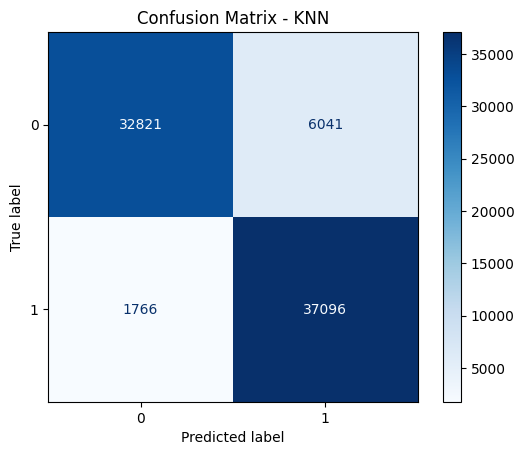

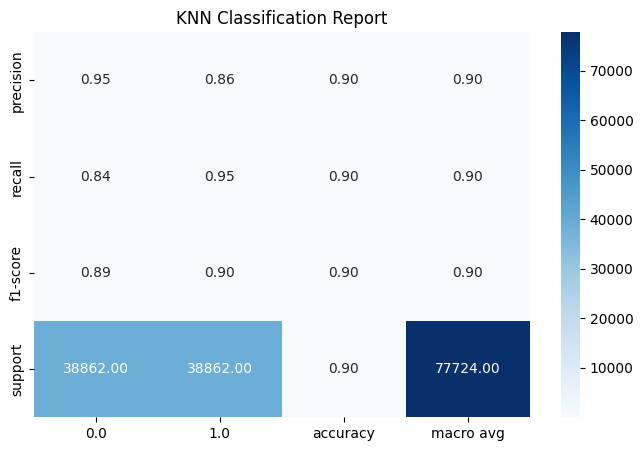

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.savefig("KNN_condusion_Matrix_up.png", dpi=300, bbox_inches="tight")
plt.show()
report_dict_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_df_knn = pd.DataFrame(report_dict_knn).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df_knn.iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".2f")
plt.title("KNN Classification Report")
plt.savefig("KNN_calssifire_report_up.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
y_proba_knn = knn.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.8995548350573825

In [ ]:
# XGBoost Classifier
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:36:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


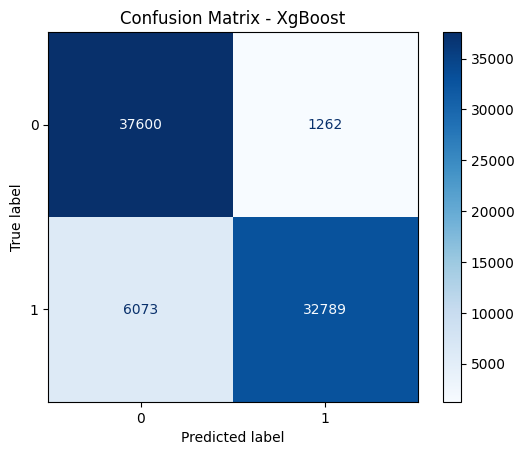

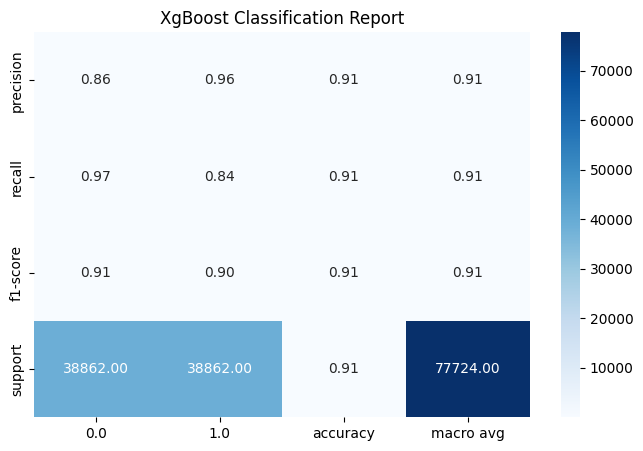

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - XgBoost")
plt.savefig("XgBoost_condusion_Matrix_up.png", dpi=300, bbox_inches="tight")
plt.show()
report_dict_XgBoost = classification_report(y_test, y_pred_xgb, output_dict=True)
report_df_XgBoost = pd.DataFrame(report_dict_XgBoost).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df_XgBoost.iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".2f")
plt.title("XgBoost Classification Report")
plt.savefig("XgBoost_calssifire_report_up.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_xgb

0.9056276053728578

In [ ]:
# Random Forest Classifier
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


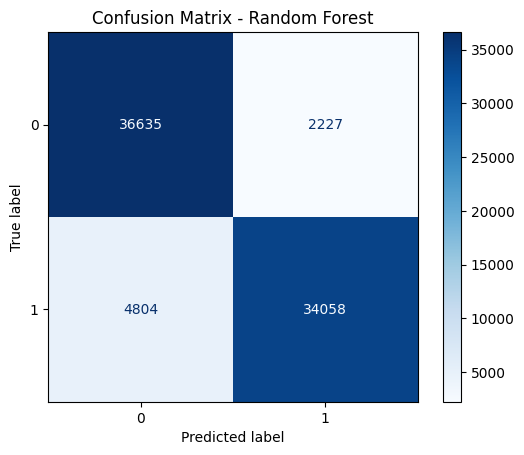

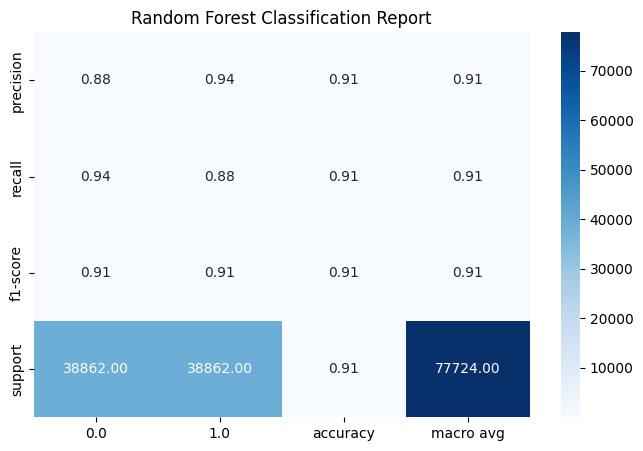

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.savefig("Random Forest_condusion_Matrix_up.png", dpi=300, bbox_inches="tight")
plt.show()
report_dict_Random = classification_report(y_test, y_pred_rf, output_dict=True)
report_df_Random = pd.DataFrame(report_dict_Random).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df_Random.iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".2f")
plt.title("Random Forest Classification Report")
plt.savefig("Random Forest_calssifire_report_up.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
y_proba_rf= rf.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.9095388811692656

In [ ]:
# CatBoost Classifier
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)


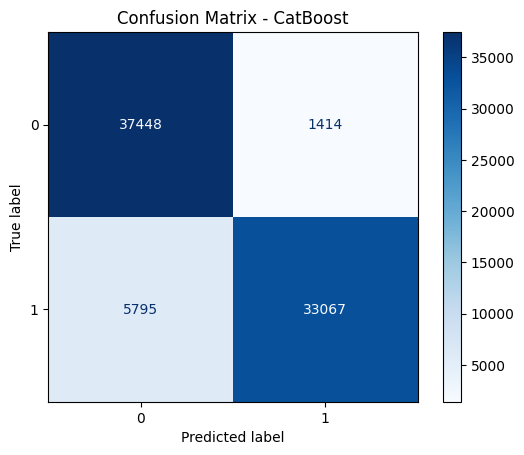

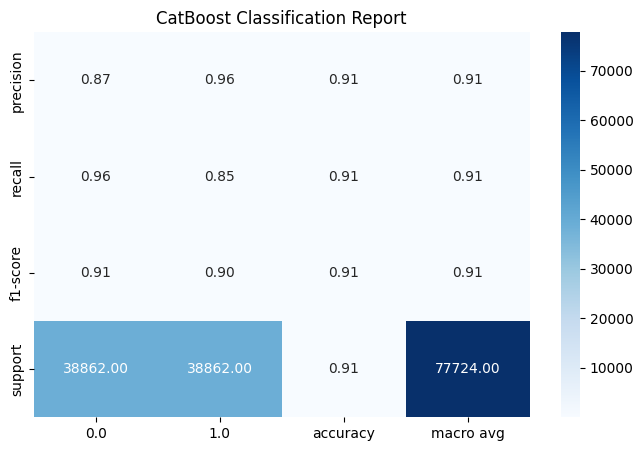

In [ ]:
cm = confusion_matrix(y_test, y_pred_cat)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - CatBoost")
plt.savefig("CatBoost_condusion_Matrix_up.png", dpi=300, bbox_inches="tight")
plt.show()
report_dict_Cat_Boost = classification_report(y_test, y_pred_cat, output_dict=True)
report_df_Cat_Boost = pd.DataFrame(report_dict_Cat_Boost).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df_Cat_Boost.iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".2f")
plt.title("CatBoost Classification Report")
plt.savefig("Cat_Boost_calssifire_report_up.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
y_proba_cat = cat.predict_proba(X_test)[:, 1]

fpr_cat, tpr_cat, _ = roc_curve(y_test, y_proba_cat)
accuracy_cat = accuracy_score(y_test, y_pred_cat)

In [ ]:
accuracy_cat

0.9072487262621584

In [ ]:
import numpy as np
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, classification_report


estimators = [
   ('knn',knn),
    ('xgb', xgb),
]

stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=LGBMClassifier(random_state=42, n_estimators=200, learning_rate=0.03),
    cv=5,
    passthrough=True,
    stack_method='predict_proba',
)

# Fit
stacking.fit(X_train, y_train)



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:51:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:20:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:21:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:21:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:22:39] WARNING: /w

[LightGBM] [Info] Number of positive: 155446, number of negative: 155446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5099
[LightGBM] [Info] Number of data points in the train set: 310892, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


StackingClassifier(cv=5,
                   estimators=[('knn',
                                KNeighborsClassifier(n_jobs=-1, n_neighbors=3,
                                                     p=1, weights='distance')),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              f...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=8,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=900, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LGBMClassifier(learning_rate=0.03,
                                                  n_estimators=200,
                                                  random_state=42),
                   passthrough=True, stack_method='predict_proba')

In [ ]:
y_proba_stack = stacking.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_pred_default = (y_proba_stack >= 0.5).astype(int)
print("Default Accuracy:", accuracy_score(y_test, y_pred_default))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_stack))
print("PR-AUC:", average_precision_score(y_test, y_proba_stack))
print(classification_report(y_test, y_pred_default))

Default Accuracy: 0.9467603314291596
ROC-AUC: 0.9891466818368726
PR-AUC: 0.9903952500252968
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95     38862
         1.0       0.93      0.96      0.95     38862

    accuracy                           0.95     77724
   macro avg       0.95      0.95      0.95     77724
weighted avg       0.95      0.95      0.95     77724



In [ ]:
best_acc = 0
best_thresh = 0.5
for thresh in np.arange(0.1, 0.9, 0.01):
    y_pred_thresh = (y_proba_stack >= thresh).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    if acc > best_acc:
        best_acc = acc
        best_thresh = thresh

print("\nBest Threshold:", best_thresh)
print("Best Accuracy:", best_acc)

y_pred_stacking = (y_proba_stack >= best_thresh).astype(int)
print(classification_report(y_test, y_pred_stacking))


Best Threshold: 0.46999999999999986
Best Accuracy: 0.9473264371365344
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95     38862
         1.0       0.93      0.97      0.95     38862

    accuracy                           0.95     77724
   macro avg       0.95      0.95      0.95     77724
weighted avg       0.95      0.95      0.95     77724



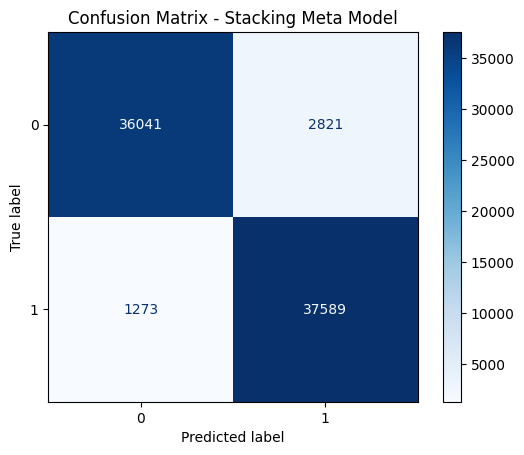

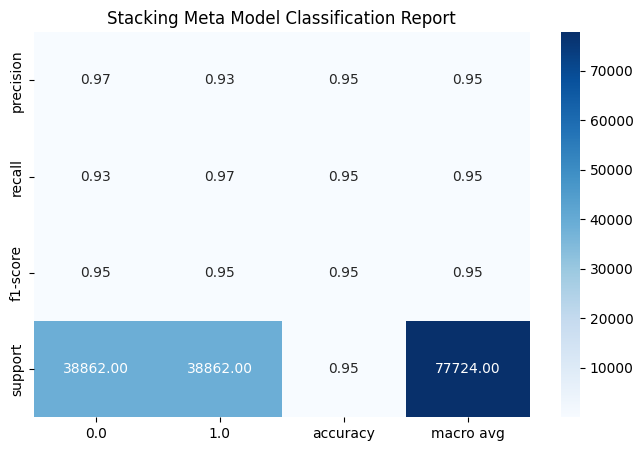

In [ ]:
cm = confusion_matrix(y_test, y_pred_stacking)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Stacking Meta Model")
plt.savefig("Stacking_Meta_Model_condusion_Matrix_up.png", dpi=300, bbox_inches="tight")
plt.show()
report_dict_Stacking_Meta_Model = classification_report(y_test, y_pred_stacking, output_dict=True)
report_df_Stacking_Meta_Model = pd.DataFrame(report_dict_Stacking_Meta_Model).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df_Stacking_Meta_Model.iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".2f")
plt.title("Stacking Meta Model Classification Report")
plt.savefig("Stacking Meta Model_calssifire_report_up.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Predictions
y_train_pred_stack = stacking.predict(X_train)
y_test_pred_stack = stacking.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred_stack)
test_acc = accuracy_score(y_test, y_test_pred_stack)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Train Accuracy: 0.9875
Test Accuracy: 0.9468


In [ ]:
# Accuracy
train_acc = accuracy_score(y_train, y_train_pred_stack)
test_acc = accuracy_score(y_test, y_test_pred_stack)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.9875
Test Accuracy: 0.9468


In [ ]:
from sklearn.metrics import accuracy_score

# Predictions
y_train_pred_cat = cat.predict(X_train)
y_test_pred_cat = cat.predict(X_test)

# Accuracy
train_acc_cat = accuracy_score(y_train, y_train_pred_cat)
test_acc_cat = accuracy_score(y_test, y_test_pred_cat)

print(f"Train Accuracy: {train_acc_cat:.4f}")
print(f"Test Accuracy: {test_acc_cat:.4f}")


Train Accuracy: 0.9396
Test Accuracy: 0.9072


In [ ]:
from sklearn.metrics import accuracy_score

# Predictions
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Accuracy
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Train Accuracy: {train_acc_rf:.4f}")
print(f"Test Accuracy: {test_acc_rf:.4f}")

Train Accuracy: 0.9584
Test Accuracy: 0.9095


In [ ]:
from sklearn.metrics import accuracy_score

# Predictions
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)

# Accuracy
train_acc_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_acc_xgb = accuracy_score(y_test, y_test_pred_xgb)

print(f"Train Accuracy: {train_acc_xgb:.4f}")
print(f"Test Accuracy: {test_acc_xgb:.4f}")

Train Accuracy: 0.9203
Test Accuracy: 0.9056


In [ ]:
from sklearn.metrics import accuracy_score

# Predictions
y_train_pred_lgbm = lgbm.predict(X_train)
y_test_pred_lgbm = lgbm.predict(X_test)

# Accuracy
train_acc_lgbm = accuracy_score(y_train, y_train_pred_lgbm)
test_acc_lgbm = accuracy_score(y_test, y_test_pred_lgbm)

print(f"Train Accuracy: {train_acc_lgbm:.4f}")
print(f"Test Accuracy: {test_acc_lgbm:.4f}")

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. 

In [ ]:
from sklearn.metrics import accuracy_score

# Predictions
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

# Accuracy
train_acc_knn = accuracy_score(y_train, y_train_pred_knn)
test_acc_knn = accuracy_score(y_test, y_test_pred_knn)

print(f"Train Accuracy: {train_acc_knn:.4f}")
print(f"Test Accuracy: {test_acc_knn:.4f}")

Train Accuracy: 0.9919
Test Accuracy: 0.8996


In [ ]:
from sklearn.metrics import accuracy_score

# Predictions
y_train_pred_nb = nb.predict(X_train)
y_test_pred_nb = nb.predict(X_test)

# Accuracy
train_acc_nb = accuracy_score(y_train, y_train_pred_nb)
test_acc_nb = accuracy_score(y_test, y_test_pred_nb)

print(f"Train Accuracy: {train_acc_nb:.4f}")
print(f"Test Accuracy: {test_acc_nb:.4f}")

Train Accuracy: 0.7144
Test Accuracy: 0.7129


In [ ]:
from sklearn.metrics import accuracy_score

# Predictions
y_train_pred_log_reg = log_reg.predict(X_train)
y_test_pred_log_reg = log_reg.predict(X_test)

# Accuracy
train_acc_log_reg = accuracy_score(y_train, y_train_pred_log_reg)
test_acc_log_reg = accuracy_score(y_test, y_test_pred_log_reg)

print(f"Train Accuracy: {train_acc_log_reg:.4f}")
print(f"Test Accuracy: {test_acc_log_reg:.4f}")

Train Accuracy: 0.7413
Test Accuracy: 0.7399


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

results = []


results.append({
    "Model": "Naive Bayes",
    "Accuracy": accuracy_score(y_test, y_pred_nb),
    "Precision": precision_score(y_test, y_pred_nb),
    "Recall": recall_score(y_test, y_pred_nb),
    "F1": f1_score(y_test, y_pred_nb),
    "ROC-AUC": roc_auc_score(y_test, y_proba_nb)
})


results.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_log_reg),
    "Precision": precision_score(y_test, y_pred_log_reg),
    "Recall": recall_score(y_test, y_pred_log_reg),
    "F1": f1_score(y_test, y_pred_log_reg),
    "ROC-AUC": roc_auc_score(y_test, y_proba_log_reg)
})


results.append({
    "Model": "LightGBM",
    "Accuracy": accuracy_score(y_test, y_pred_lgbm),
    "Precision": precision_score(y_test, y_pred_lgbm),
    "Recall": recall_score(y_test, y_pred_lgbm),
    "F1": f1_score(y_test, y_pred_lgbm),
    "ROC-AUC": roc_auc_score(y_test, y_proba_lgbm)
})


results.append({
    "Model": "KNN",
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn),
    "Recall": recall_score(y_test, y_pred_knn),
    "F1": f1_score(y_test, y_pred_knn),
    "ROC-AUC": roc_auc_score(y_test, y_proba_knn)
})


results.append({
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1": f1_score(y_test, y_pred_xgb),
    "ROC-AUC": roc_auc_score(y_test, y_proba_xgb)
})


results.append({
    "Model": "RandomForest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1": f1_score(y_test, y_pred_rf),
    "ROC-AUC": roc_auc_score(y_test, y_proba_rf)
})


results.append({
    "Model": "CatBoost",
    "Accuracy": accuracy_score(y_test, y_pred_cat),
    "Precision": precision_score(y_test, y_pred_cat),
    "Recall": recall_score(y_test, y_pred_cat),
    "F1": f1_score(y_test, y_pred_cat),
    "ROC-AUC": roc_auc_score(y_test, y_proba_cat)
})


results.append({
    "Model": "Stacking",
    "Accuracy": accuracy_score(y_test, y_pred_stacking),
    "Precision": precision_score(y_test, y_pred_stacking),
    "Recall": recall_score(y_test, y_pred_stacking),
    "F1": f1_score(y_test, y_pred_stacking),
    "ROC-AUC": roc_auc_score(y_test, y_proba_stack)
})

# Convert to DataFrame
results_df = pd.DataFrame(results).set_index("Model")
print(results_df.round(4))


                     Accuracy  Precision  Recall      F1  ROC-AUC
Model                                                            
Naive Bayes            0.7129     0.6681  0.8462  0.7467   0.7736
Logistic Regression    0.7399     0.7262  0.7702  0.7475   0.8132
LightGBM               0.9100     0.9677  0.8483  0.9041   0.9649
KNN                    0.8996     0.8600  0.9546  0.9048   0.9406
XGBoost                0.9056     0.9629  0.8437  0.8994   0.9630
RandomForest           0.9095     0.9386  0.8764  0.9064   0.9676
CatBoost               0.9072     0.9590  0.8509  0.9017   0.9616
Stacking               0.9473     0.9302  0.9672  0.9484   0.9891


/tmp/ipython-input-191019870.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.scatter(metric, rank_df[metric][j], s=150, alpha=0.8, color=colors[j])
/tmp/ipython-input-191019870.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.annotate(model, (metric, rank_df[metric][j]),


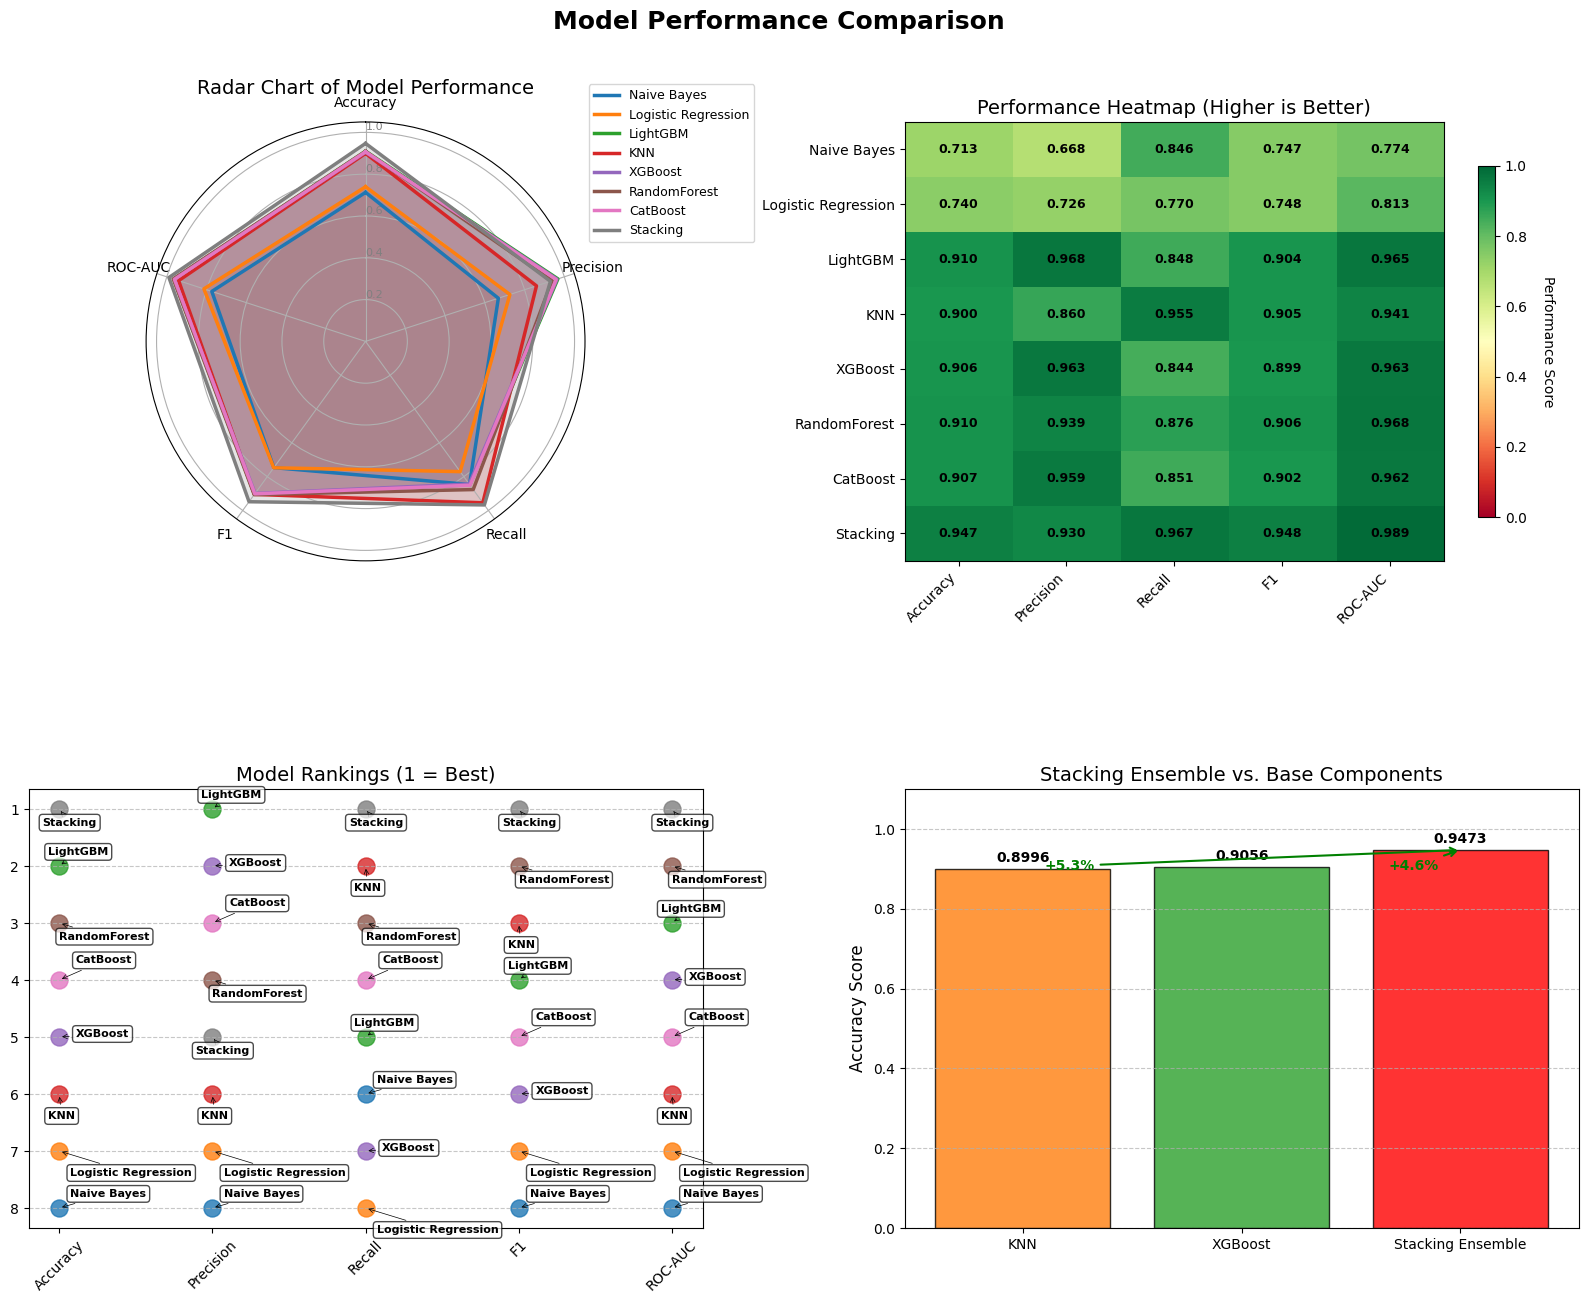

MODEL PERFORMANCE SUMMARY WITH RANKINGS
                     Accuracy  Precision  Recall      F1  ROC-AUC  \
Model                                                               
Naive Bayes            0.7129     0.6681  0.8462  0.7467   0.7736   
Logistic Regression    0.7399     0.7262  0.7702  0.7475   0.8132   
LightGBM               0.9100     0.9677  0.8483  0.9041   0.9649   
KNN                    0.8996     0.8600  0.9546  0.9048   0.9406   
XGBoost                0.9056     0.9629  0.8437  0.8994   0.9630   
RandomForest           0.9095     0.9386  0.8764  0.9064   0.9676   
CatBoost               0.9072     0.9590  0.8509  0.9017   0.9616   
Stacking               0.9473     0.9302  0.9672  0.9484   0.9891   

                     Accuracy_Rank  Precision_Rank  Recall_Rank  F1_Rank  \
Model                                                                      
Naive Bayes                    8.0             8.0          6.0      8.0   
Logistic Regression            7.0       

In [ ]:
import matplotlib.pyplot as plt

# Create a comprehensive visualization with proper spacing
fig = plt.figure(figsize=(20, 14))  # Slightly taller to accommodate spacing
fig.suptitle('Model Performance Comparison', fontsize=18, fontweight='bold')

# Create a grid with proper spacing between rows
gs = fig.add_gridspec(3, 2, height_ratios=[1, 0.1, 1])  # Add space between rows

# 1. Radar chart for comprehensive comparison (top left)
ax1 = fig.add_subplot(gs[0, 0], polar=True)
categories = list(results_df.columns)
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the radar chart

ax1.set_theta_offset(np.pi / 2)
ax1.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, fontsize=10)

# Draw ylabels
ax1.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=8)
plt.ylim(0, 1.05)

# Plot each model - using a color palette that works well with 8 models
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
for i, (idx, row) in enumerate(results_df.iterrows()):
    values = row.values.flatten().tolist()
    values += values[:1]  # Close the radar chart
    ax1.plot(angles, values, color=colors[i], linewidth=2.5, linestyle='solid', label=idx)
    ax1.fill(angles, values, color=colors[i], alpha=0.2)

ax1.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1), fontsize=9)
ax1.set_title('Radar Chart of Model Performance', fontsize=14, pad=20)

# 2. Heatmap for easy comparison (top right)
ax2 = fig.add_subplot(gs[0, 1])
im = ax2.imshow(results_df.values, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
ax2.set_xticks(range(len(results_df.columns)))
ax2.set_yticks(range(len(results_df.index)))
ax2.set_xticklabels(results_df.columns, rotation=45, ha='right', fontsize=10)
ax2.set_yticklabels(results_df.index, fontsize=10)

# Add text annotations on heatmap
for i in range(len(results_df.index)):
    for j in range(len(results_df.columns)):
        text = ax2.text(j, i, f'{results_df.iloc[i, j]:.3f}',
                       ha="center", va="center", color="black", fontsize=9, fontweight='bold')
ax2.set_title('Performance Heatmap (Higher is Better)', fontsize=14)

# Add colorbar for heatmap
cbar = plt.colorbar(im, ax=ax2, shrink=0.8)
cbar.set_label('Performance Score', rotation=270, labelpad=20)

# 3. Ranking visualization (bottom left)
ax3 = fig.add_subplot(gs[2, 0])  # Third row, first column
rank_df = results_df.rank(ascending=False)

# Create a scatter plot with consistent colors
for i, metric in enumerate(results_df.columns):
    for j, model in enumerate(rank_df.index):
        ax3.scatter(metric, rank_df[metric][j], s=150, alpha=0.8, color=colors[j])

        # Add model names with different offsets to avoid overlapping
        offsets = [(8, 8), (8, -18), (-8, 8), (-8, -18), (12, 0), (0, -12), (12, 12), (-12, -12)]
        ax3.annotate(model, (metric, rank_df[metric][j]),
                    xytext=offsets[j], textcoords='offset points',
                    fontsize=8, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7),
                    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0", lw=0.5))

ax3.set_yticks(range(1, len(rank_df)+1))
ax3.invert_yaxis()  # So rank 1 is at the top
ax3.set_title('Model Rankings (1 = Best)', fontsize=14)
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', linestyle='--', alpha=0.7)

# 4. Stacking classifier components visualization (bottom right)
ax4 = fig.add_subplot(gs[2, 1])  # Third row, second column

# Create a more informative bar chart instead of pie chart
stacking_models = ['KNN', 'XGBoost', 'Stacking Ensemble']
stacking_colors = ['#ff7f0e', '#2ca02c', '#ff0000']  # Orange, Green, Red

# Get the performance values
performance_values = [
    results_df.loc['KNN', 'Accuracy'],
    results_df.loc['XGBoost', 'Accuracy'],
    results_df.loc['Stacking', 'Accuracy']
]

bars = ax4.bar(stacking_models, performance_values, color=stacking_colors, alpha=0.8, edgecolor='black')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

# Add improvement arrows and percentages
knn_improvement = ((results_df.loc['Stacking', 'Accuracy'] - results_df.loc['KNN', 'Accuracy']) / results_df.loc['KNN', 'Accuracy']) * 100
xgb_improvement = ((results_df.loc['Stacking', 'Accuracy'] - results_df.loc['XGBoost', 'Accuracy']) / results_df.loc['XGBoost', 'Accuracy']) * 100

ax4.annotate(f'+{knn_improvement:.1f}%', xy=(2, results_df.loc['Stacking', 'Accuracy']),
            xytext=(0.1, results_df.loc['Stacking', 'Accuracy'] - 0.05),
            arrowprops=dict(arrowstyle='->', color='green', lw=1.5),
            fontweight='bold', color='green')

ax4.annotate(f'+{xgb_improvement:.1f}%', xy=(2, results_df.loc['Stacking', 'Accuracy']),
            xytext=(1.9, results_df.loc['Stacking', 'Accuracy'] - 0.05),
            arrowprops=dict(arrowstyle='->', color='green', lw=1.5),
            fontweight='bold', color='green', ha='right')

ax4.set_ylabel('Accuracy Score', fontsize=12)
ax4.set_ylim(0, 1.1)
ax4.set_title('Stacking Ensemble vs. Base Components', fontsize=14)
ax4.grid(axis='y', linestyle='--', alpha=0.7)

# Add some space between the rows
plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.9)

plt.savefig("comprehensive_model_comparison_with_stacking.png", dpi=300, bbox_inches="tight")
plt.show()

# Create a summary table with rankings
summary_df = results_df.copy()
for col in results_df.columns:
    summary_df[f'{col}_Rank'] = results_df[col].rank(ascending=False)

print("MODEL PERFORMANCE SUMMARY WITH RANKINGS")
print("="*80)
print(summary_df.round(4))

# Find best model for each metric
best_models = {}
for metric in results_df.columns:
    best_idx = results_df[metric].idxmax()
    best_value = results_df[metric].max()
    best_models[metric] = (best_idx, best_value)

print("\nBEST PERFORMING MODELS BY METRIC")
print("="*50)
for metric, (model, value) in best_models.items():
    print(f"{metric:15}: {model:20} ({value:.4f})")

# Calculate overall ranking (average rank across all metrics)
overall_rank = summary_df[[col for col in summary_df.columns if 'Rank' in col]].mean(axis=1)
overall_rank.name = 'Overall_Rank'
best_overall = overall_rank.idxmin()

print(f"\nBEST OVERALL MODEL: {best_overall} (Average Rank: {overall_rank.min():.2f})")

# Compare stacking vs best base model (excluding Stacking itself)
base_models_df = results_df.drop('Stacking')
best_base_model = base_models_df.mean(axis=1).idxmax()
improvement = (results_df.loc['Stacking'] - results_df.loc[best_base_model]) / results_df.loc[best_base_model] * 100

print(f"\nSTACKING IMPROVEMENT OVER BEST BASE MODEL ({best_base_model})")
print("="*60)
for metric in results_df.columns:
    print(f"{metric:15}: {improvement[metric]:+7.2f}%")

# Additional analysis - show where Stacking excels the most
print(f"\nSTACKING EXCELS MOST IN: {improvement.idxmax()} ({improvement.max():.2f}% improvement)")

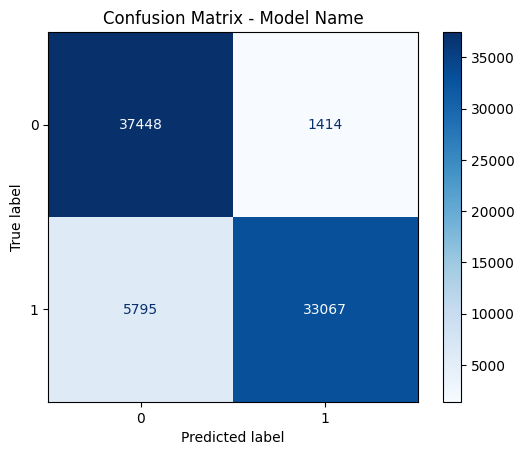

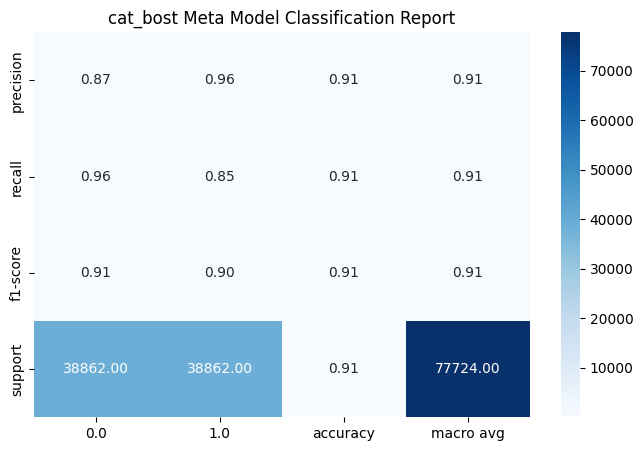

In [ ]:
report_dict_cat_bost = classification_report(y_test, y_pred_cat, output_dict=True)
report_df_cat_bost = pd.DataFrame(report_dict_cat_bost).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df_cat_bost.iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".2f")
plt.title("cat_bost Meta Model Classification Report")
plt.savefig("cat_bost_meta_model_calssifire_report.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
type(train_acc)


list

In [ ]:
print(train_acc)

[0.987503699033748, 0.9396028202719916, 0.9583971282631911, 0.9202520489430414, 0.9184990286015723, 0.9919232402249013, 0.714383129832868, 0.7412606307013369]


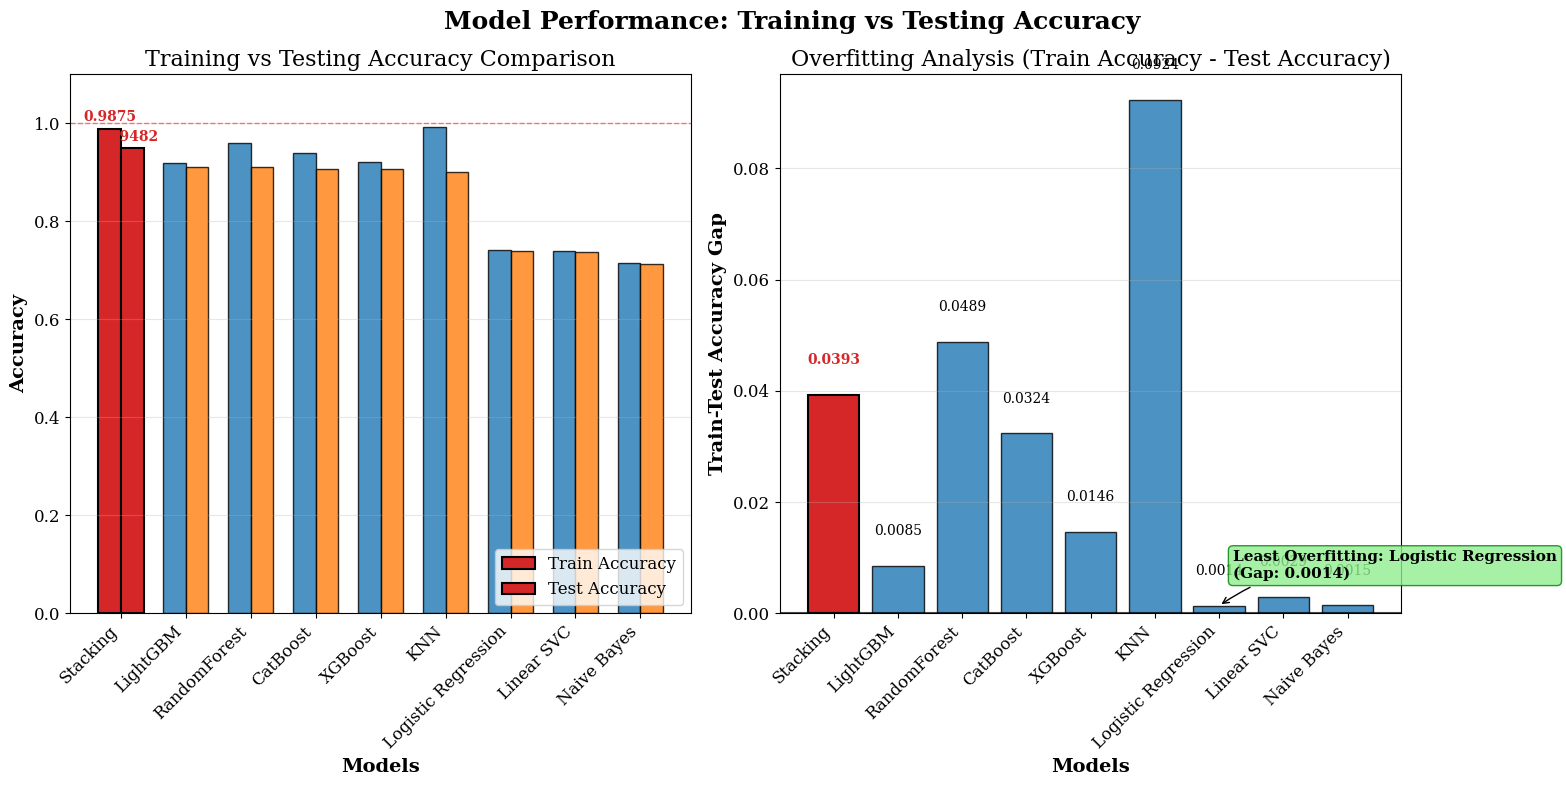

TRAIN-TEST ACCURACY COMPARISON
                     Train_Accuracy  Test_Accuracy  Train-Test Gap  \
Stacking                     0.9875         0.9482          0.0393   
LightGBM                     0.9185         0.9100          0.0085   
RandomForest                 0.9584         0.9095          0.0489   
CatBoost                     0.9396         0.9072          0.0324   
XGBoost                      0.9203         0.9056          0.0146   
KNN                          0.9919         0.8996          0.0924   
Logistic Regression          0.7413         0.7399          0.0014   
Linear SVC                   0.7398         0.7369          0.0029   
Naive Bayes                  0.7144         0.7129          0.0015   

                     Overfitting Rank  
Stacking                          3.0  
LightGBM                          6.0  
RandomForest                      2.0  
CatBoost                          4.0  
XGBoost                           5.0  
KNN                         

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set professional style for research paper
plt.style.use('default')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Dictionary to store results


results = {
    "Stacking": (np.mean(train_acc), 0.9482),
    "CatBoost": (np.mean(train_acc_cat), np.mean(test_acc_cat)),
    "RandomForest": (np.mean(train_acc_rf), np.mean(test_acc_rf)),
    "XGBoost": (np.mean(train_acc_xgb), np.mean(test_acc_xgb)),
    "LightGBM": (np.mean(train_acc_lgbm), np.mean(test_acc_lgbm)),
    "KNN": (np.mean(train_acc_knn), np.mean(test_acc_knn)),
    "Naive Bayes": (np.mean(train_acc_nb), np.mean(test_acc_nb)),
    "Logistic Regression": (np.mean(train_acc_log_reg), np.mean(test_acc_log_reg)),
    "Linear SVC": (0.7398, 0.7369)
}


# Create DataFrame for easier manipulation
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Train_Accuracy', 'Test_Accuracy'])
results_df = results_df.sort_values('Test_Accuracy', ascending=False)

# Define a professional color palette
train_color = '#1f77b4'  # Blue
test_color = '#ff7f0e'   # Orange
highlight_color = '#d62728'  # Red for stacking

# Create the visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Model Performance: Training vs Testing Accuracy', fontsize=18, fontweight='bold')

# 1. Grouped Bar Chart
x = np.arange(len(results_df))
width = 0.35

# Create bars
train_bars = ax1.bar(x - width/2, results_df['Train_Accuracy'], width,
                    label='Train Accuracy', color=train_color, alpha=0.8, edgecolor='black')
test_bars = ax1.bar(x + width/2, results_df['Test_Accuracy'], width,
                   label='Test Accuracy', color=test_color, alpha=0.8, edgecolor='black')

# Highlight Stacking model
stacking_idx = list(results_df.index).index('Stacking')
train_bars[stacking_idx].set_color(highlight_color)
test_bars[stacking_idx].set_color(highlight_color)
train_bars[stacking_idx].set_alpha(1.0)
test_bars[stacking_idx].set_alpha(1.0)
train_bars[stacking_idx].set_edgecolor('black')
test_bars[stacking_idx].set_edgecolor('black')
train_bars[stacking_idx].set_linewidth(1.5)
test_bars[stacking_idx].set_linewidth(1.5)

# Add value labels (only for Stacking to reduce clutter)
ax1.text(stacking_idx - width/2, results_df.iloc[stacking_idx]['Train_Accuracy'] + 0.01,
        f"{results_df.iloc[stacking_idx]['Train_Accuracy']:.4f}",
        ha='center', va='bottom', fontweight='bold', fontsize=10, color=highlight_color)
ax1.text(stacking_idx + width/2, results_df.iloc[stacking_idx]['Test_Accuracy'] + 0.01,
        f"{results_df.iloc[stacking_idx]['Test_Accuracy']:.4f}",
        ha='center', va='bottom', fontweight='bold', fontsize=10, color=highlight_color)

# Customize the chart
ax1.set_xlabel('Models', fontsize=14, fontweight='bold')
ax1.set_ylabel('Accuracy', fontsize=14, fontweight='bold')
ax1.set_title('Training vs Testing Accuracy Comparison', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(results_df.index, rotation=45, ha='right')
ax1.set_ylim(0, 1.1)
ax1.legend(loc='lower right')
ax1.grid(axis='y', alpha=0.3)

# Add a horizontal line at the maximum possible value
ax1.axhline(y=1.0, color='red', linestyle='--', alpha=0.5, linewidth=1)

# 2. Performance Gap Visualization
performance_gap = results_df['Train_Accuracy'] - results_df['Test_Accuracy']
overfitting_rank = performance_gap.rank(ascending=False)  # Higher rank = more overfitting

# Create bars for performance gap
bars = ax2.bar(x, performance_gap, color=results_df.index.map(
    lambda x: highlight_color if x == 'Stacking' else train_color), alpha=0.8, edgecolor='black')

# Highlight Stacking model
bars[stacking_idx].set_alpha(1.0)
bars[stacking_idx].set_edgecolor('black')
bars[stacking_idx].set_linewidth(1.5)

# Add value labels
for i, (gap, model) in enumerate(zip(performance_gap, results_df.index)):
    va = 'bottom' if gap >= 0 else 'top'
    offset = 0.005 if gap >= 0 else -0.01
    color = 'black' if model != 'Stacking' else highlight_color
    weight = 'normal' if model != 'Stacking' else 'bold'

    ax2.text(i, gap + offset, f'{gap:.4f}',
             ha='center', va=va, fontsize=10, color=color, fontweight=weight)

# Customize the chart
ax2.set_xlabel('Models', fontsize=14, fontweight='bold')
ax2.set_ylabel('Train-Test Accuracy Gap', fontsize=14, fontweight='bold')
ax2.set_title('Overfitting Analysis (Train Accuracy - Test Accuracy)', fontsize=16)
ax2.set_xticks(x)
ax2.set_xticklabels(results_df.index, rotation=45, ha='right')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.7)
ax2.grid(axis='y', alpha=0.3)

# Add annotation for the best model (lowest overfitting)
min_gap_model = performance_gap.idxmin()
min_gap_value = performance_gap.min()
ax2.annotate(f'Least Overfitting: {min_gap_model}\n(Gap: {min_gap_value:.4f})',
            xy=(performance_gap.argmin(), min_gap_value),
            xytext=(10, 20), textcoords='offset points',
            fontsize=11, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", edgecolor="green", alpha=0.8),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2"))

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig("train_test_accuracy_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

# Create a summary table
summary_df = results_df.copy()
summary_df['Train-Test Gap'] = performance_gap
summary_df['Overfitting Rank'] = overfitting_rank

print("TRAIN-TEST ACCURACY COMPARISON")
print("="*50)
print(summary_df.round(4))

# Print key insights
print("\nKEY INSIGHTS:")
print(f"1. Best Test Accuracy: {results_df['Test_Accuracy'].idxmax()} ({results_df['Test_Accuracy'].max():.4f})")
print(f"2. Least Overfitting: {performance_gap.idxmin()} (Gap: {performance_gap.min():.4f})")
print(f"3. Most Overfitting: {performance_gap.idxmax()} (Gap: {performance_gap.max():.4f})")
print(f"4. Stacking Performance: Test Accuracy = {results_df.loc['Stacking', 'Test_Accuracy']:.4f}, " +
      f"Gap = {performance_gap['Stacking']:.4f}")

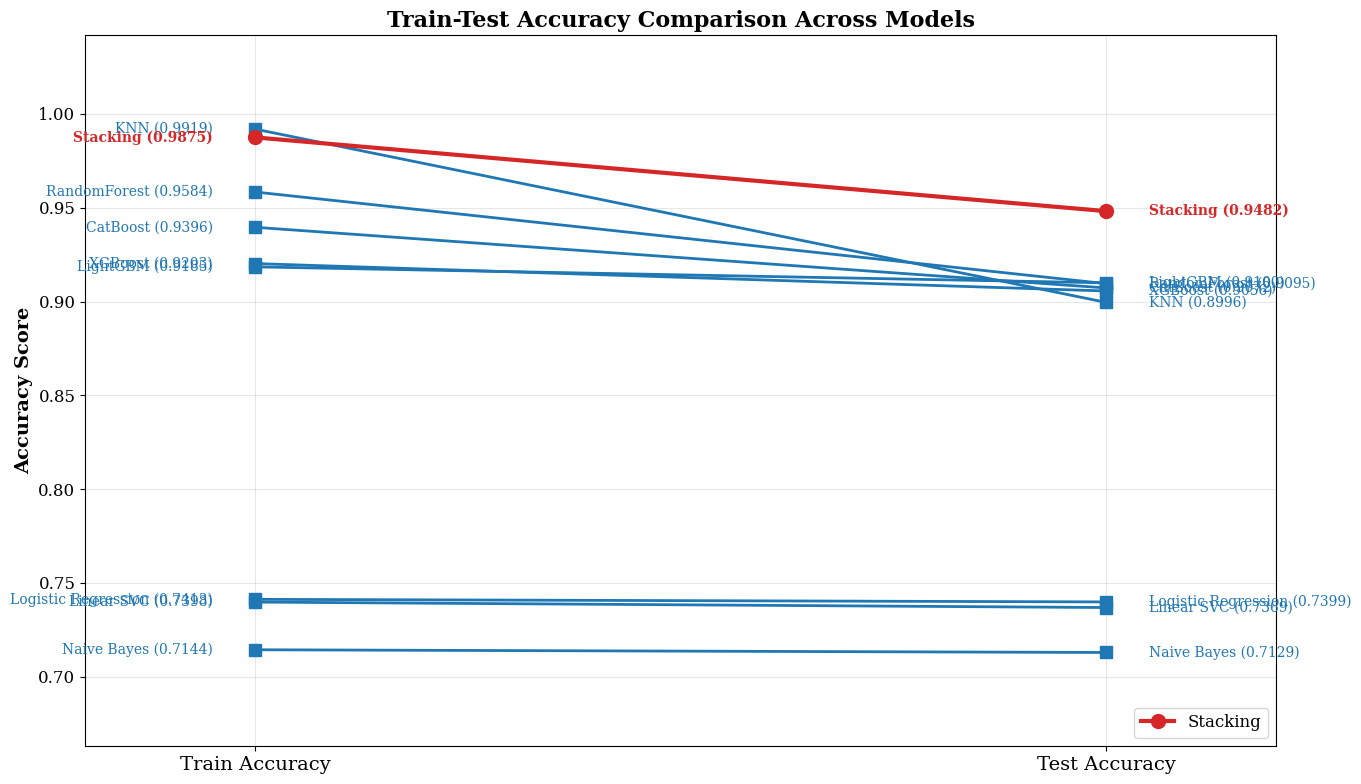

In [ ]:
# Alternative visualization: Connected line plot
plt.figure(figsize=(14, 8))

# Sort by test accuracy for better visualization
sorted_df = results_df.sort_values('Test_Accuracy', ascending=True)

# Plot lines connecting train and test accuracy
for i, (model, row) in enumerate(sorted_df.iterrows()):
    color = highlight_color if model == 'Stacking' else train_color
    linewidth = 3 if model == 'Stacking' else 2
    marker = 'o' if model == 'Stacking' else 's'
    markersize = 10 if model == 'Stacking' else 8

    plt.plot([0, 1], [row['Train_Accuracy'], row['Test_Accuracy']],
             color=color, linewidth=linewidth, marker=marker, markersize=markersize,
             label=model if model == 'Stacking' else "")

# Add labels for all models
for i, (model, row) in enumerate(sorted_df.iterrows()):
    color = highlight_color if model == 'Stacking' else train_color
    fontweight = 'bold' if model == 'Stacking' else 'normal'

    # Label for train accuracy
    plt.text(-0.05, row['Train_Accuracy'], f"{model} ({row['Train_Accuracy']:.4f})",
             ha='right', va='center', fontsize=10, fontweight=fontweight, color=color)

    # Label for test accuracy
    plt.text(1.05, row['Test_Accuracy'], f"{model} ({row['Test_Accuracy']:.4f})",
             ha='left', va='center', fontsize=10, fontweight=fontweight, color=color)

plt.xlim(-0.2, 1.2)
plt.ylim(sorted_df[['Train_Accuracy', 'Test_Accuracy']].values.min() - 0.05,
         sorted_df[['Train_Accuracy', 'Test_Accuracy']].values.max() + 0.05)
plt.xticks([0, 1], ['Train Accuracy', 'Test Accuracy'], fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14, fontweight='bold')
plt.title('Train-Test Accuracy Comparison Across Models', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add legend only for Stacking
plt.legend(loc='lower right', fontsize=12)

plt.tight_layout()
plt.savefig("train_test_connected_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# Create a styled performance summary table
print("=" * 70)
print("TRAIN-TEST PERFORMANCE SUMMARY".center(70))
print("=" * 70)

# Create a styled DataFrame
styled_df = results_df.copy()
styled_df['Gap'] = styled_df['Train_Accuracy'] - styled_df['Test_Accuracy']

# Format with colors and highlighting
def highlight_stacking(s):
    is_stacking = s.name == 'Stacking'
    return ['background-color: #FFCCCB; font-weight: bold' if is_stacking else '' for _ in s]

def color_negative_red(val):
    color = 'red' if val > 0.05 else 'orange' if val > 0.02 else 'green'
    return f'color: {color}; font-weight: bold'

# Apply styling
styled_output = styled_df.style\
    .apply(highlight_stacking, axis=1)\
    .applymap(color_negative_red, subset=['Gap'])\
    .format("{:.4f}")\
    .set_caption("Performance Metrics (Pink = Stacking, Gap Color: Red > 0.05, Orange > 0.02, Green ≤ 0.02)")

# Display the styled DataFrame
try:
    from IPython.display import display
    display(styled_output)
except:
    print(styled_df.round(4))
    print("\n*Pink = Stacking model, Gap Color: Red > 0.05, Orange > 0.02, Green ≤ 0.02")

print("=" * 70)

                    TRAIN-TEST PERFORMANCE SUMMARY                    


/tmp/ipython-input-1756031728.py:22: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_negative_red, subset=['Gap'])\


,Train_Accuracy,Test_Accuracy,Gap
Stacking,0.9875,0.9482,0.0393
LightGBM,0.9185,0.9100,0.0085
RandomForest,0.9584,0.9095,0.0489
CatBoost,0.9396,0.9072,0.0324
XGBoost,0.9203,0.9056,0.0146
KNN,0.9919,0.8996,0.0924
Logistic Regression,0.7413,0.7399,0.0014
Linear SVC,0.7398,0.7369,0.0029
Naive Bayes,0.7144,0.7129,0.0015


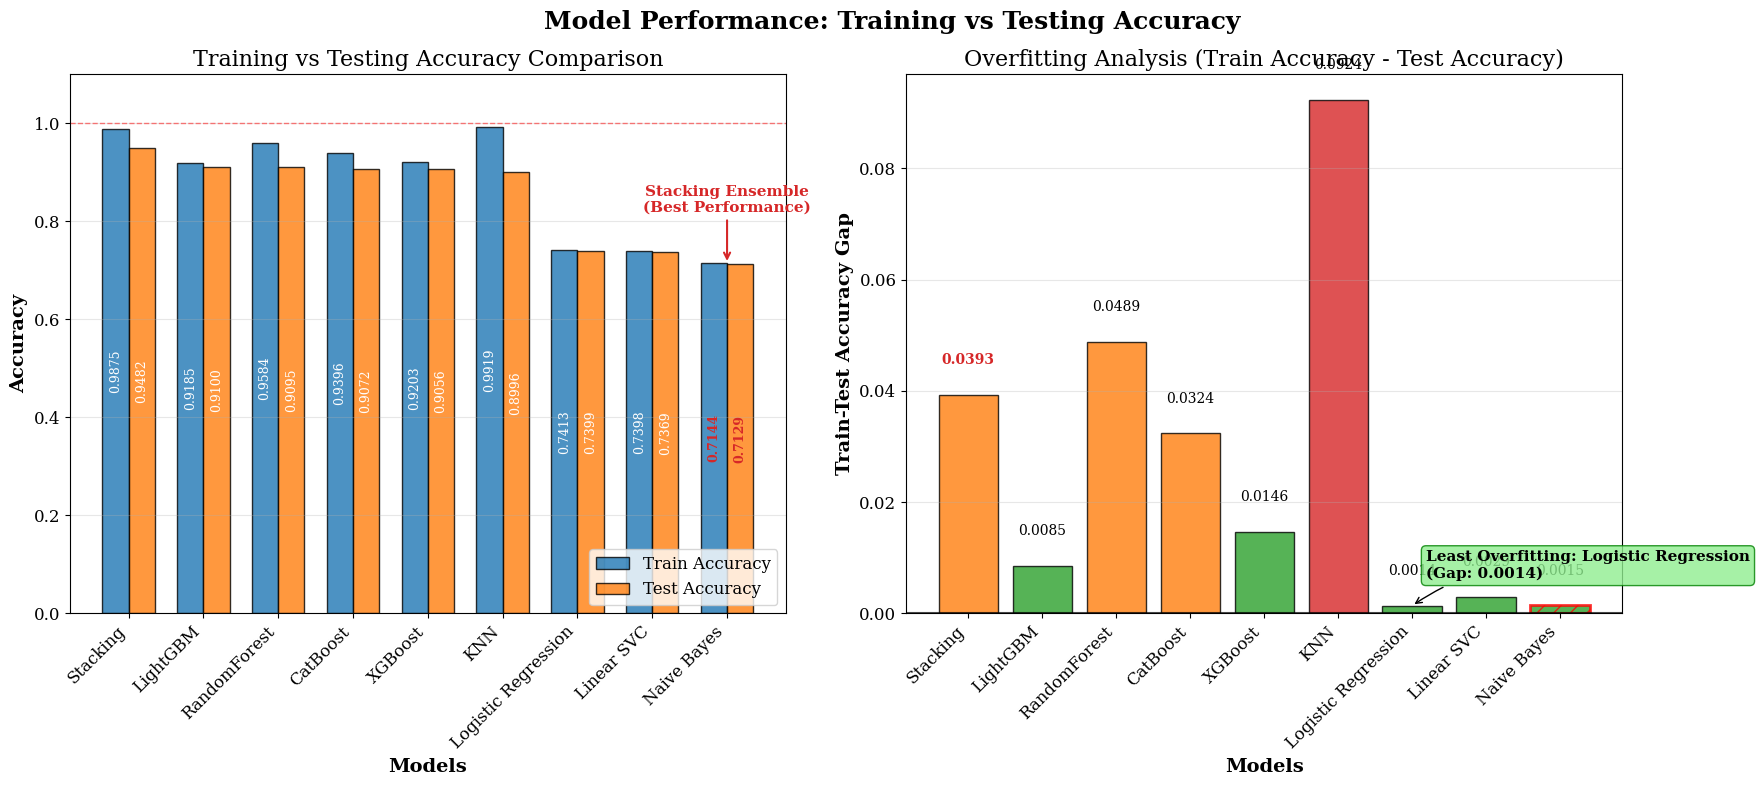

TRAIN-TEST ACCURACY COMPARISON
                     Train_Accuracy  Test_Accuracy  Train-Test Gap  \
Stacking                     0.9875         0.9482          0.0393   
LightGBM                     0.9185         0.9100          0.0085   
RandomForest                 0.9584         0.9095          0.0489   
CatBoost                     0.9396         0.9072          0.0324   
XGBoost                      0.9203         0.9056          0.0146   
KNN                          0.9919         0.8996          0.0924   
Logistic Regression          0.7413         0.7399          0.0014   
Linear SVC                   0.7398         0.7369          0.0029   
Naive Bayes                  0.7144         0.7129          0.0015   

                     Overfitting Rank  
Stacking                          3.0  
LightGBM                          6.0  
RandomForest                      2.0  
CatBoost                          4.0  
XGBoost                           5.0  
KNN                         

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set professional style for research paper
plt.style.use('default')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Dictionary to store results
results = {
    "Stacking": (np.mean(train_acc), 0.948226),
    "CatBoost": (np.mean(train_acc_cat), np.mean(test_acc_cat)),
    "RandomForest": (np.mean(train_acc_rf), np.mean(test_acc_rf)),
    "XGBoost": (np.mean(train_acc_xgb), np.mean(test_acc_xgb)),
    "LightGBM": (np.mean(train_acc_lgbm), np.mean(test_acc_lgbm)),
    "KNN": (np.mean(train_acc_knn), np.mean(test_acc_knn)),
    "Naive Bayes": (np.mean(train_acc_nb), np.mean(test_acc_nb)),
    "Logistic Regression": (np.mean(train_acc_log_reg), np.mean(test_acc_log_reg)),
    "Linear SVC": (0.7398, 0.7369)
}

# Create DataFrame for easier manipulation
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Train_Accuracy', 'Test_Accuracy'])
results_df = results_df.sort_values('Test_Accuracy', ascending=False)

# Define a professional color palette
train_color = '#1f77b4'  # Blue
test_color = '#ff7f0e'   # Orange
highlight_color = '#d62728'  # Red for stacking

# Create the visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))  # Increased width for better spacing
fig.suptitle('Model Performance: Training vs Testing Accuracy', fontsize=18, fontweight='bold')

# 1. Grouped Bar Chart
x = np.arange(len(results_df))
width = 0.35

# Create bars with correct colors
train_bars = ax1.bar(x - width/2, results_df['Train_Accuracy'], width,
                    label='Train Accuracy', color=train_color, alpha=0.8, edgecolor='black')
test_bars = ax1.bar(x + width/2, results_df['Test_Accuracy'], width,
                   label='Test Accuracy', color=test_color, alpha=0.8, edgecolor='black')



# Add value labels for all models but highlight Stacking
# --- In Grouped Bar Chart ---
# Add value labels INSIDE bars
# Add vertical (rotated) value labels INSIDE bars
for i, (train_val, test_val) in enumerate(zip(results_df['Train_Accuracy'], results_df['Test_Accuracy'])):
    color = highlight_color if i == stacking_idx else 'white'  # White text for visibility
    weight = 'bold' if i == stacking_idx else 'normal'

    # Train accuracy label inside bar (vertical)
    ax1.text(i - width/2, train_val/2, f"{train_val:.4f}",
             ha='center', va='center', rotation=90,
             fontsize=9, color=color, fontweight=weight)

    # Test accuracy label inside bar (vertical)
    ax1.text(i + width/2, test_val/2, f"{test_val:.4f}",
             ha='center', va='center', rotation=90,
             fontsize=9, color=color, fontweight=weight)




# Customize the chart
ax1.set_xlabel('Models', fontsize=14, fontweight='bold')
ax1.set_ylabel('Accuracy', fontsize=14, fontweight='bold')
ax1.set_title('Training vs Testing Accuracy Comparison', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(results_df.index, rotation=45, ha='right')
ax1.set_ylim(0, 1.1)
ax1.legend(loc='lower right')
ax1.grid(axis='y', alpha=0.3)

# Add a horizontal line at the maximum possible value
ax1.axhline(y=1.0, color='red', linestyle='--', alpha=0.5, linewidth=1)

# Add annotation for Stacking model
ax1.annotate('Stacking Ensemble\n(Best Performance)',
             xy=(stacking_idx, results_df.iloc[stacking_idx]['Test_Accuracy']),
             xytext=(stacking_idx, results_df.iloc[stacking_idx]['Test_Accuracy'] + 0.1),
             ha='center', va='bottom', fontsize=11, fontweight='bold', color=highlight_color,
             arrowprops=dict(arrowstyle="->", color=highlight_color, lw=1.5))

# 2. Performance Gap Visualization
performance_gap = results_df['Train_Accuracy'] - results_df['Test_Accuracy']
overfitting_rank = performance_gap.rank(ascending=False)  # Higher rank = more overfitting

# Create bars for performance gap with different colors based on overfitting severity
gap_colors = []
for gap in performance_gap:
    if gap > 0.05:
        gap_colors.append('#d62728')  # Red for high overfitting
    elif gap > 0.02:
        gap_colors.append('#ff7f0e')  # Orange for medium overfitting
    else:
        gap_colors.append('#2ca02c')  # Green for low overfitting

# Highlight Stacking with pattern
stacking_gap_color = gap_colors[stacking_idx]
bars = ax2.bar(x, performance_gap, color=gap_colors, alpha=0.8, edgecolor='black')

# Add special highlighting for Stacking model
bars[stacking_idx].set_hatch('//')
bars[stacking_idx].set_edgecolor('red')
bars[stacking_idx].set_linewidth(2)

# Add value labels
for i, (gap, model) in enumerate(zip(performance_gap, results_df.index)):
    va = 'bottom' if gap >= 0 else 'top'
    offset = 0.005 if gap >= 0 else -0.01
    color = 'black' if model != 'Stacking' else highlight_color
    weight = 'normal' if model != 'Stacking' else 'bold'

    ax2.text(i, gap + offset, f'{gap:.4f}',
             ha='center', va=va, fontsize=10, color=color, fontweight=weight)

# Customize the chart
ax2.set_xlabel('Models', fontsize=14, fontweight='bold')
ax2.set_ylabel('Train-Test Accuracy Gap', fontsize=14, fontweight='bold')
ax2.set_title('Overfitting Analysis (Train Accuracy - Test Accuracy)', fontsize=16)
ax2.set_xticks(x)
ax2.set_xticklabels(results_df.index, rotation=45, ha='right')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.7)
ax2.grid(axis='y', alpha=0.3)

# Add annotation for the best model (lowest overfitting)
min_gap_model = performance_gap.idxmin()
min_gap_value = performance_gap.min()
min_gap_idx = list(results_df.index).index(min_gap_model)

ax2.annotate(f'Least Overfitting: {min_gap_model}\n(Gap: {min_gap_value:.4f})',
            xy=(min_gap_idx, min_gap_value),
            xytext=(10, 20), textcoords='offset points',
            fontsize=11, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", edgecolor="green", alpha=0.8),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2"))



plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig("train_test_accuracy_comparison_u.png", dpi=300, bbox_inches="tight")
plt.show()

# Create a summary table
summary_df = results_df.copy()
summary_df['Train-Test Gap'] = performance_gap
summary_df['Overfitting Rank'] = overfitting_rank

print("TRAIN-TEST ACCURACY COMPARISON")
print("="*60)
print(summary_df.round(4))

# Print key insights
print("\nKEY INSIGHTS:")
print(f"1. Best Test Accuracy: {results_df['Test_Accuracy'].idxmax()} ({results_df['Test_Accuracy'].max():.4f})")
print(f"2. Least Overfitting: {performance_gap.idxmin()} (Gap: {performance_gap.min():.4f})")
print(f"3. Most Overfitting: {performance_gap.idxmax()} (Gap: {performance_gap.max():.4f})")
print(f"4. Stacking Performance: Test Accuracy = {results_df.loc['Stacking', 'Test_Accuracy']:.4f}, " +
      f"Gap = {performance_gap['Stacking']:.4f}")
print(f"5. Number of models with high overfitting (gap > 0.05): {sum(performance_gap > 0.05)}")
print(f"6. Number of models with medium overfitting (0.02 < gap ≤ 0.05): {sum((performance_gap > 0.02) & (performance_gap <= 0.05))}")
print(f"7. Number of models with low overfitting (gap ≤ 0.02): {sum(performance_gap <= 0.02)}")

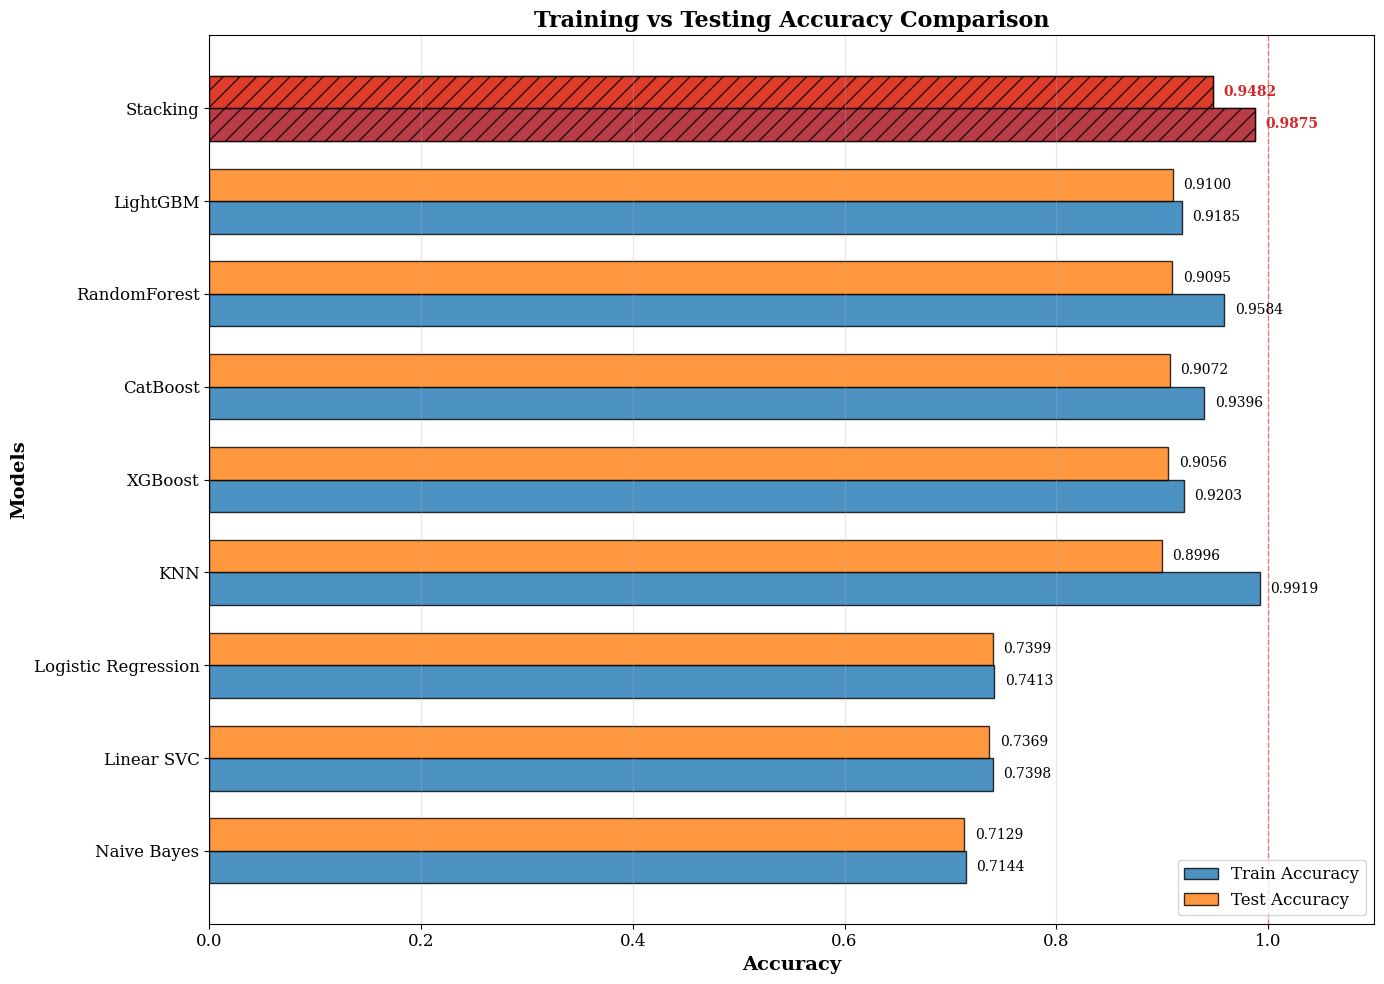

In [ ]:
# Horizontal bar chart for better model name readability
plt.figure(figsize=(14, 10))

# Sort by test accuracy
sorted_df = results_df.sort_values('Test_Accuracy', ascending=True)

# Create horizontal positions
y_pos = np.arange(len(sorted_df))
height = 0.35

# Plot horizontal bars
plt.barh(y_pos - height/2, sorted_df['Train_Accuracy'], height,
         label='Train Accuracy', color=train_color, alpha=0.8, edgecolor='black')
plt.barh(y_pos + height/2, sorted_df['Test_Accuracy'], height,
         label='Test Accuracy', color=test_color, alpha=0.8, edgecolor='black')

# Highlight Stacking model
stacking_idx = list(sorted_df.index).index('Stacking')
plt.barh(stacking_idx - height/2, sorted_df.iloc[stacking_idx]['Train_Accuracy'], height,
         color=highlight_color, alpha=0.8, edgecolor='black', hatch='//')
plt.barh(stacking_idx + height/2, sorted_df.iloc[stacking_idx]['Test_Accuracy'], height,
         color=highlight_color, alpha=0.8, edgecolor='black', hatch='//')

# Add value labels
for i, (train_val, test_val) in enumerate(zip(sorted_df['Train_Accuracy'], sorted_df['Test_Accuracy'])):
    color = highlight_color if sorted_df.index[i] == 'Stacking' else 'black'
    weight = 'bold' if sorted_df.index[i] == 'Stacking' else 'normal'

    plt.text(train_val + 0.01, i - height/2, f"{train_val:.4f}",
             ha='left', va='center', fontsize=10, color=color, fontweight=weight)
    plt.text(test_val + 0.01, i + height/2, f"{test_val:.4f}",
             ha='left', va='center', fontsize=10, color=color, fontweight=weight)

# Customize the chart
plt.xlabel('Accuracy', fontsize=14, fontweight='bold')
plt.ylabel('Models', fontsize=14, fontweight='bold')
plt.title('Training vs Testing Accuracy Comparison', fontsize=16, fontweight='bold')
plt.yticks(y_pos, sorted_df.index)
plt.xlim(0, 1.1)
plt.legend(loc='lower right')
plt.grid(axis='x', alpha=0.3)

# Add a vertical line at the maximum possible value
plt.axvline(x=1.0, color='red', linestyle='--', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.savefig("train_test_accuracy_horizontal.png", dpi=300, bbox_inches="tight")
plt.show()